# Envrionment Class Usage

Here we explore the different environment models available by default in RocketPy. Let's start by importing the rocketpy module.

In [1]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

If you are using Jupyter Notebooks, it is recommended to run the following line to make matplotlib plots which will be shown later interactive and higher quality.

In [3]:
%matplotlib notebook

## Elevation

The elevation of the launch site of a rocket is particularly important for determining its interection with the atmosphere and Earth's gravitational field.

Sometimes, together with the latitude and longitude of the launch site, the elevation which is measured in meters above sea level is known and can be used to initialize an Environment class instance as follows.

In [4]:
Env = Environment(railLength=5,
                  date=(2019, 2, 10, 18),
                  latitude=-21.960641,
                  longitude=-47.482122,
                  elevation=110)

However, this is not always the case. Lucky for us, there are alternatives to find an aproximate value of the elevation of the launch site if the latitude and longitude values are know.

One option is to use the value supplied by some atmospheric models. Since elevation data is crucial for Numerical Weather Programing, some weather models make elevation data available together with other variables. But this will be covered later.

Another very useful and handy option is to use [Open-Elevation](https://open-elevation.com/), a free and open-source elevation API. It is built right into RocketPy and one can use it as follows.

First, we initiaize a new Environment.

In [5]:
Env = Environment(railLength=5,
                  date=(2019, 2, 10, 18),
                  latitude=-21.960641,
                  longitude=-47.482122)

Then, we use the Environment.setElevation method with the input parameter as 'Open-Elevation'. Note, however, that Open-Elevation servers are not always available.

In [6]:
# Env.setElevation('Open-Elevation')

To get information from the Environment, just use the Environment.info() or the Environment.allInfo() methods.

Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2019-02-10 18:00:00  UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Launch Site Surface Elevation:  0  m


Atmospheric Model Details

Atmospheric Model Type:  StandardAtmosphere
StandardAtmosphere Maximum Height: 80.000 km


Atmospheric Model Plots


<IPython.core.display.Javascript object>


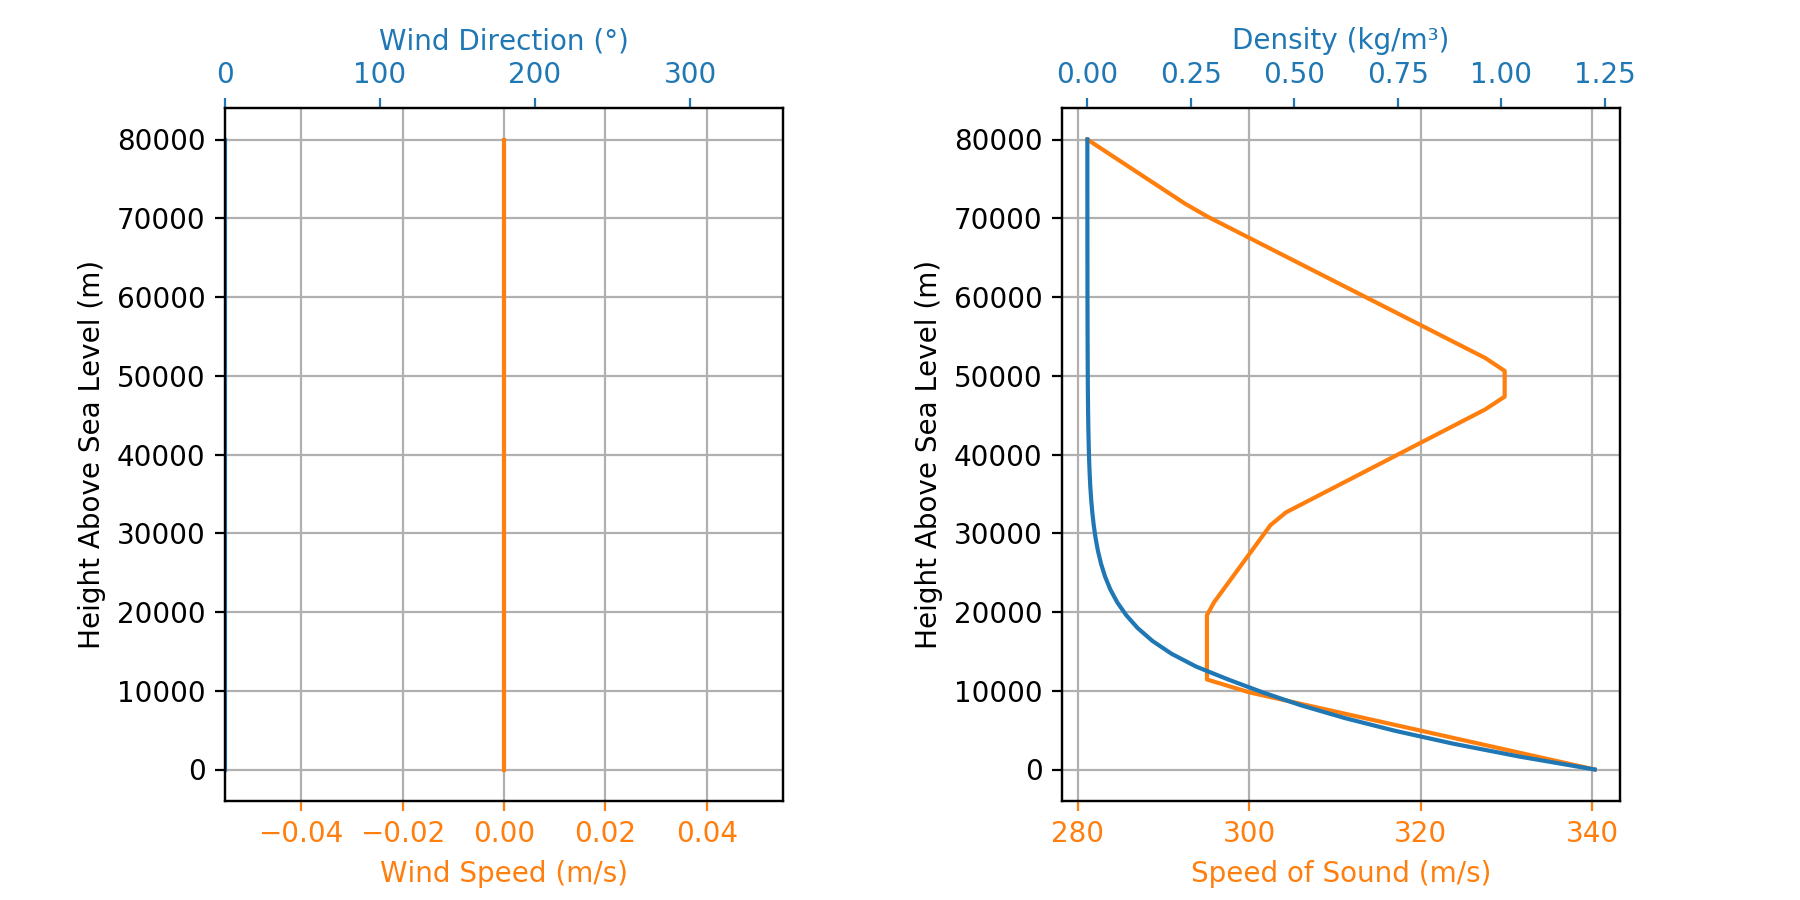

In [7]:
Env.info()

## Atmospheric Models

### Using the Standard Atmosphere

By default, when initializing an environment class, the International Standard Atmosphere as defined by ISO 2533 is initialized.

Note that the International Standard Atmosphere only has temperature and pressure profiles properly specified. Other profiles can be derived from it, however, winds are automatically set to 0 m/s.

In [5]:
EnvISA = Environment(railLength=5)

Launch Site Details

Launch Rail Length:  5  m
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type:  StandardAtmosphere
StandardAtmosphere Maximum Height: 80.000 km


Atmospheric Model Plots


<IPython.core.display.Javascript object>


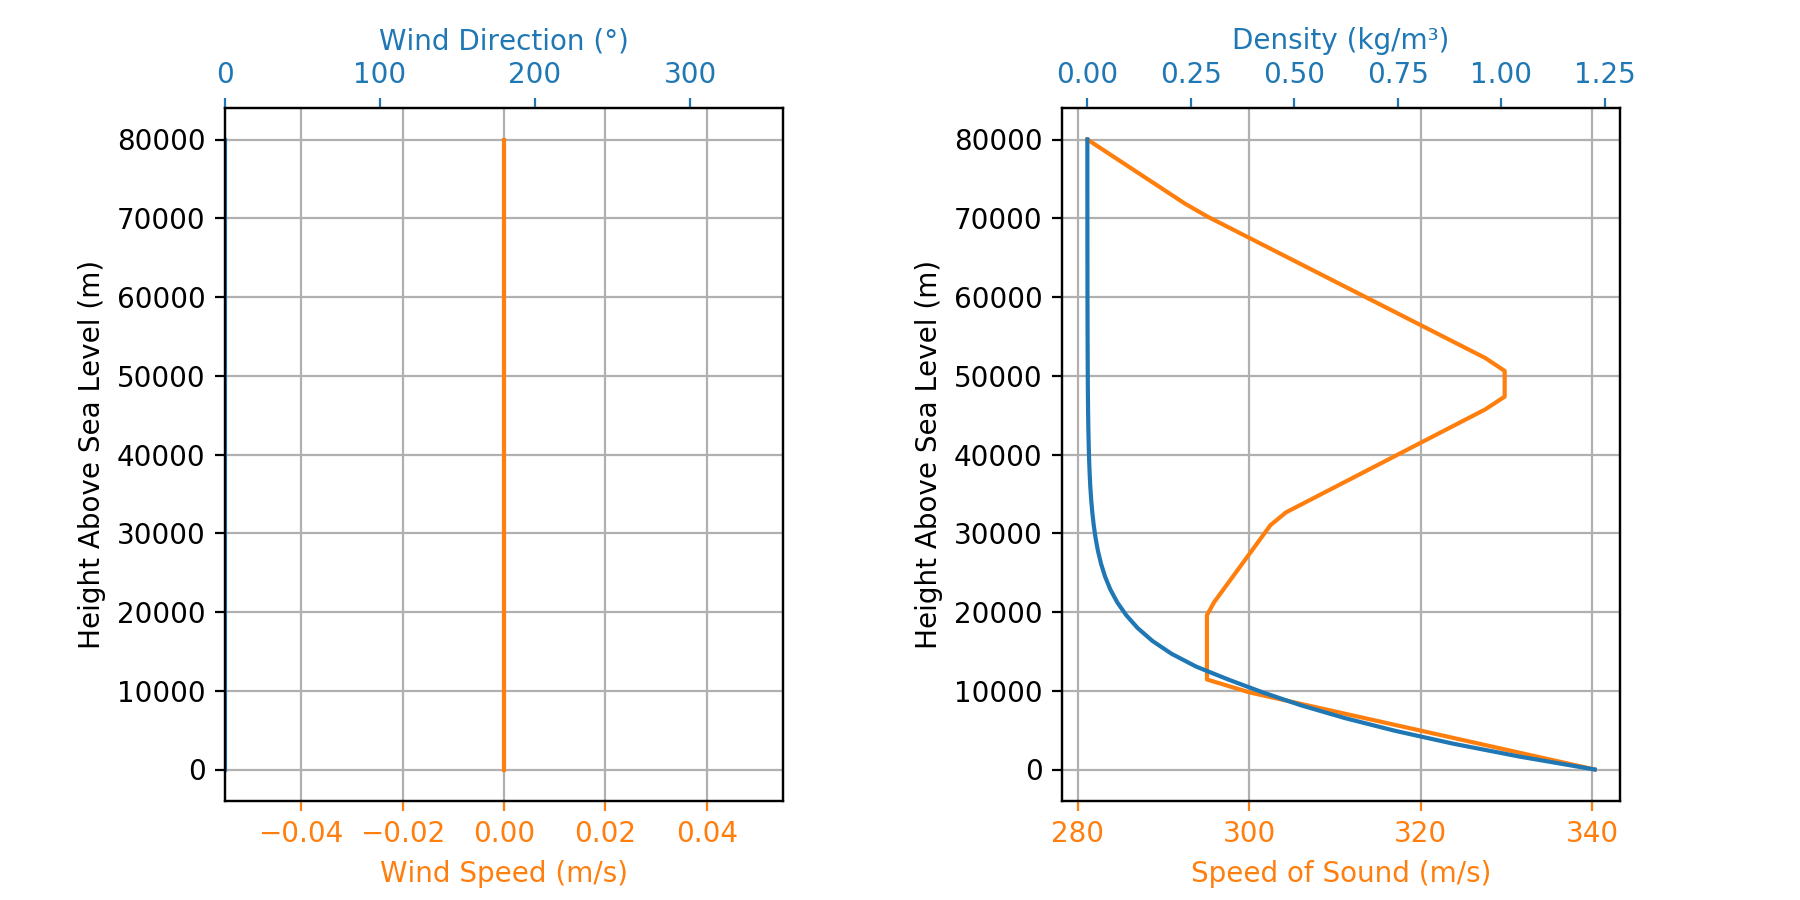

In [6]:
EnvISA.info()

The International Standard Atmosphere can also be reseted at any time by using the following method.

In [10]:
EnvISA.setAtmosphericModel(type='StandardAtmosphere')

### Using a Costum Atmosphere

The user can also set a completely costumized atmosphere. This is particularly useful for setting costum values of wind in both directions.

First, we initialize a new Environment.

In [11]:
EnvCA = Environment(railLength=5)

Then, we set the atmospheric model as 'CostumAtmosphere'.

Leaving the pressure field as None means we want the International Standard Atmosphere's pressure profile to be used. We could have done the same with temperature, but to showcase how floats can be used, we set the temperature field as a constant 300 K profile.

For the wind, we need to specify its value in both U (east) and V (north) direction. In this case, we used arrays to specify points. Consider a wind U profile of 5 m/s at 0 m and 10 m/s at 1000 m. For the wind V, we used -2 m/s at 0 m, 3 m/s at 500 m and 2 m/s at 1000 m.

In [12]:
EnvCA.setAtmosphericModel(type='CostumAtmosphere',
                         pressure=None,
                         temperature=300,
                         wind_u=[(0, 5), (1000, 10)],
                         wind_v=[(0, -2), (500, 3), (1600, 2)])

Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5  m
Launch Site Surface Elevation:  0  m


Atmospheric Model Details

Atmospheric Model Type:  CostumAtmosphere
CostumAtmosphere Maximum Height: 1.600 km


Atmospheric Model Plots


<IPython.core.display.Javascript object>


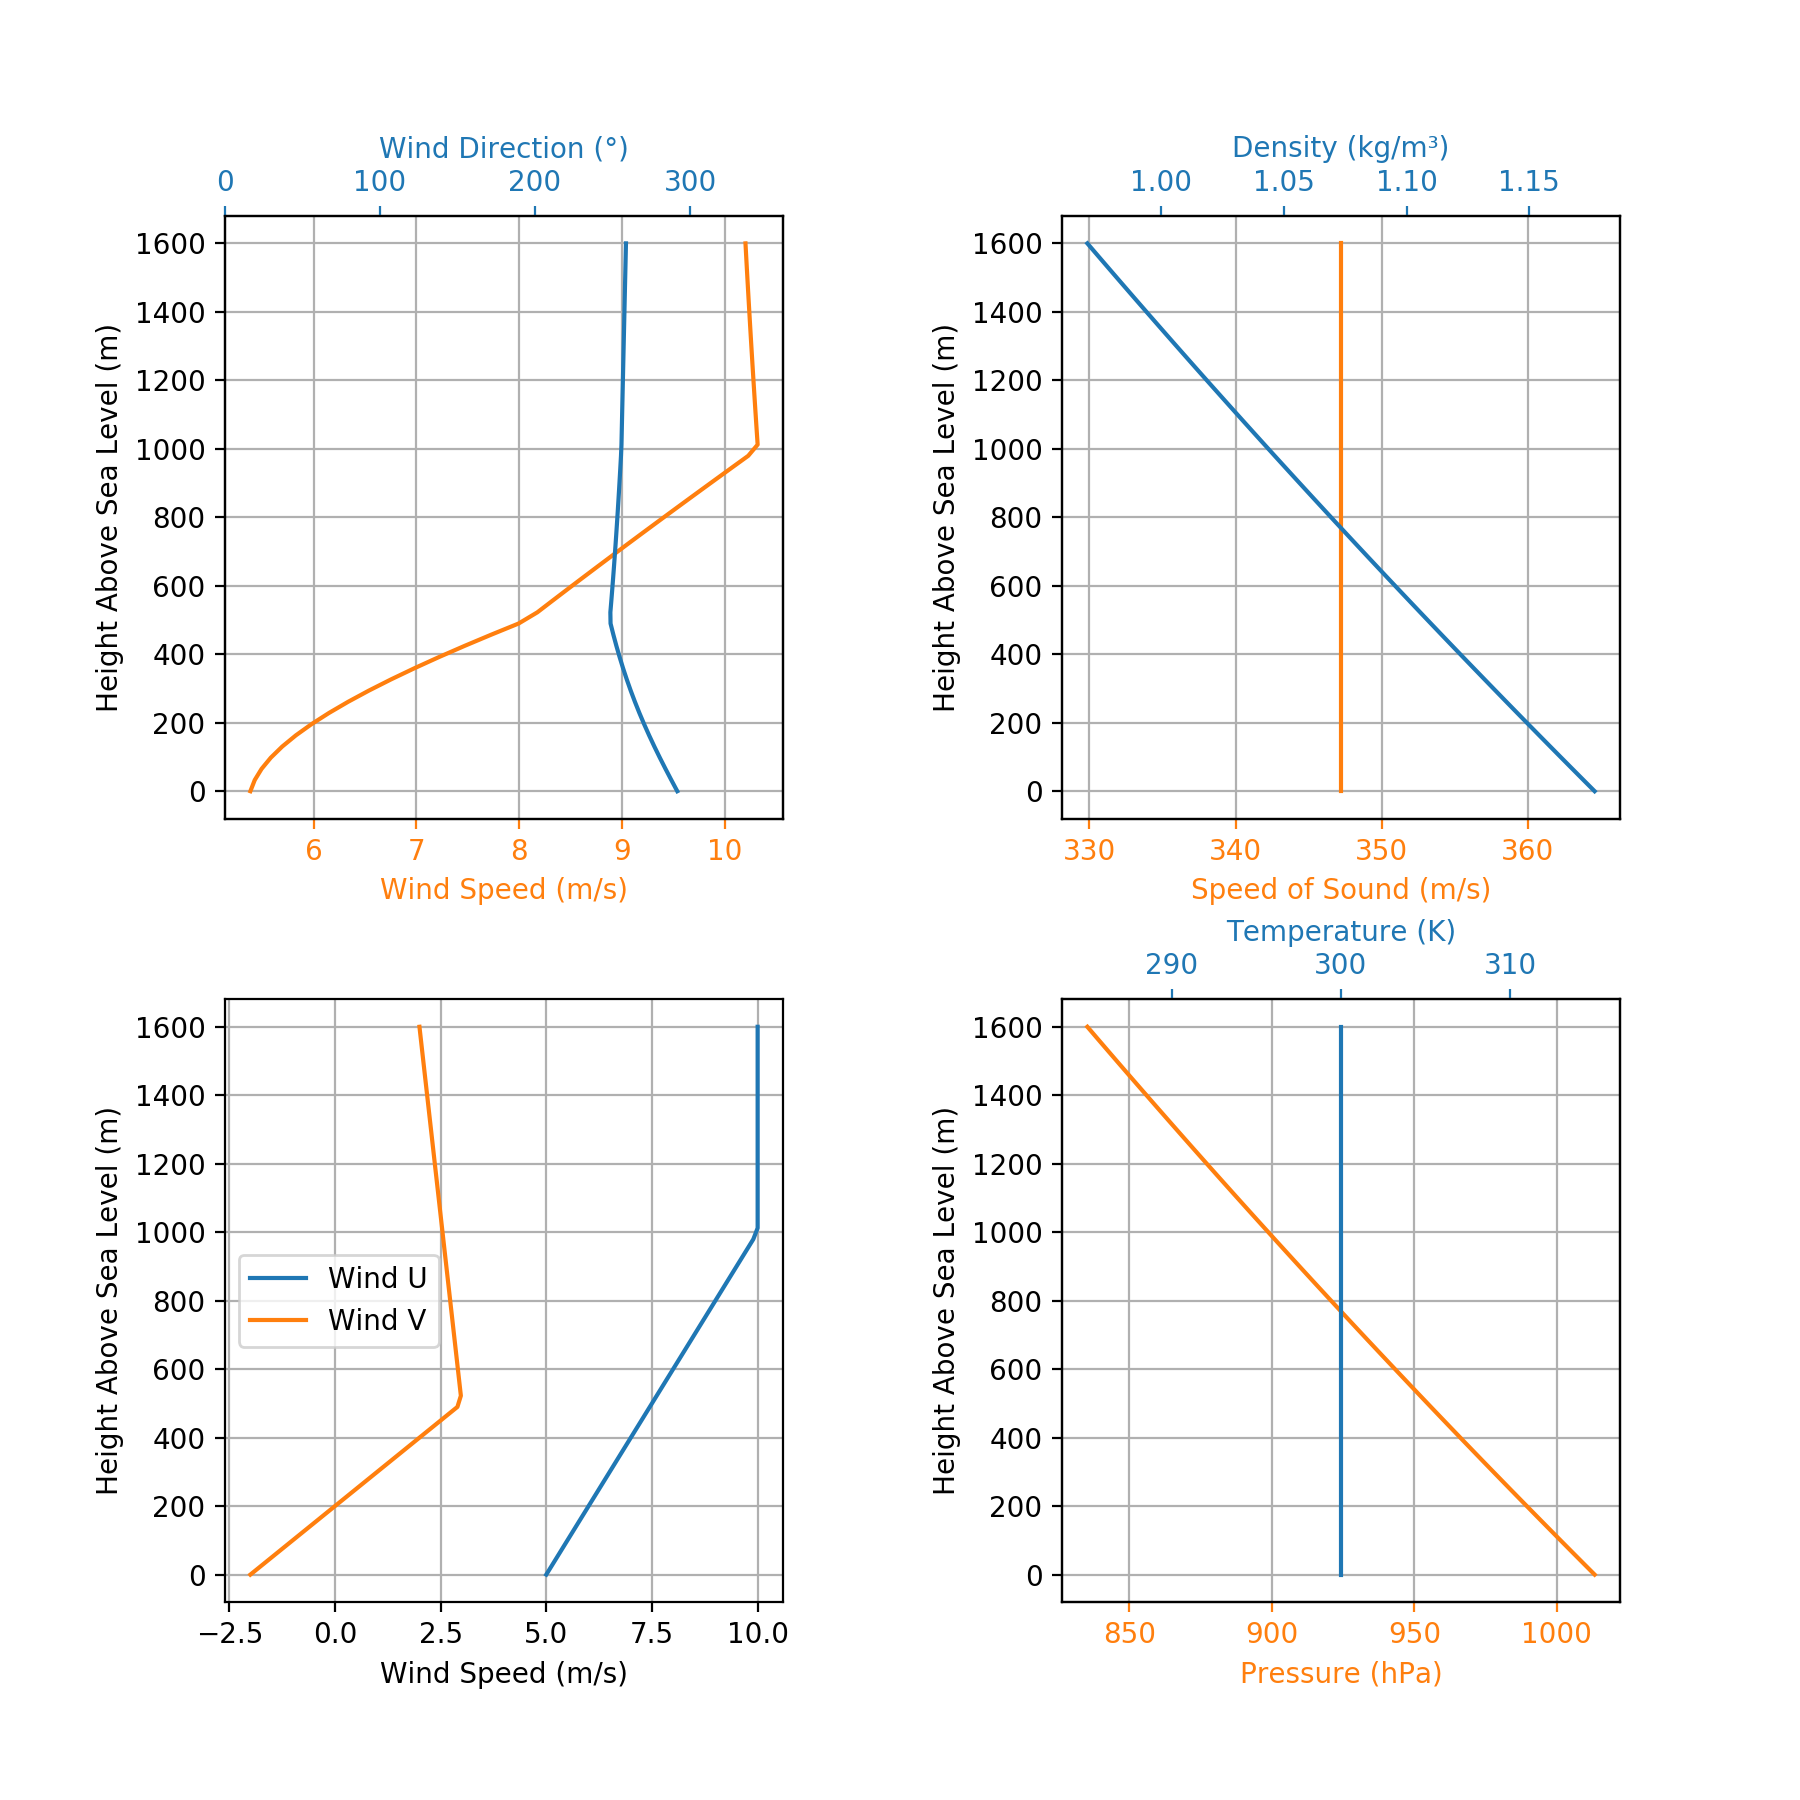

In [13]:
EnvCA.allInfo()

Keep in mind that importing .csv files for Costum Atmospheres is also possible. See the documentation on Environment.setAtmosphericModel for more information.

### Using Wyoming Upper Air Soundings

Another option to define atmospheric conditions is to use upper air soundings. The University of Wyoming - College of Enginnering - Department of Atmospheric Sciences has a great compilation of atmospheric soundings on their website which can be found [here](http://weather.uwyo.edu/upperair/sounding.html).

For this example, we will use the sounding from 83779 SBMT Marte Civ Observations at 00Z 04 Feb 2019 which can be accessed using the URL generated by the above website: [http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779](http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779).

First, we initialize a new Environment. There is no need to specify dates, latitude and longitude here, so we will skip them for know.

In [14]:
EnvWUAS = Environment(railLength=5)

Now, we set use the URL above as the input to our atmospheric model.

In [15]:
URL = 'http://weather.uwyo.edu/cgi-bin/sounding?region=samer&TYPE=TEXT%3ALIST&YEAR=2019&MONTH=02&FROM=0500&TO=0512&STNM=83779'

EnvWUAS.setAtmosphericModel(type='WyomingSounding', file=URL)

Next, notice how even though we have not specified a surface elevation for our Environment, it has one set! The reason is that Wyoming Uper Air Soundings have elevation data for the sounding station, which is used to set the elevation of the Environment. If you do not want this elevation, you can change using Environment.setElevation(desired elevation in meters).

Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5  m
Launch Site Surface Elevation:  722.0  m


Atmospheric Model Details

Atmospheric Model Type:  WyomingSounding
WyomingSounding Maximum Height: 22.077 km


Atmospheric Model Plots


<IPython.core.display.Javascript object>


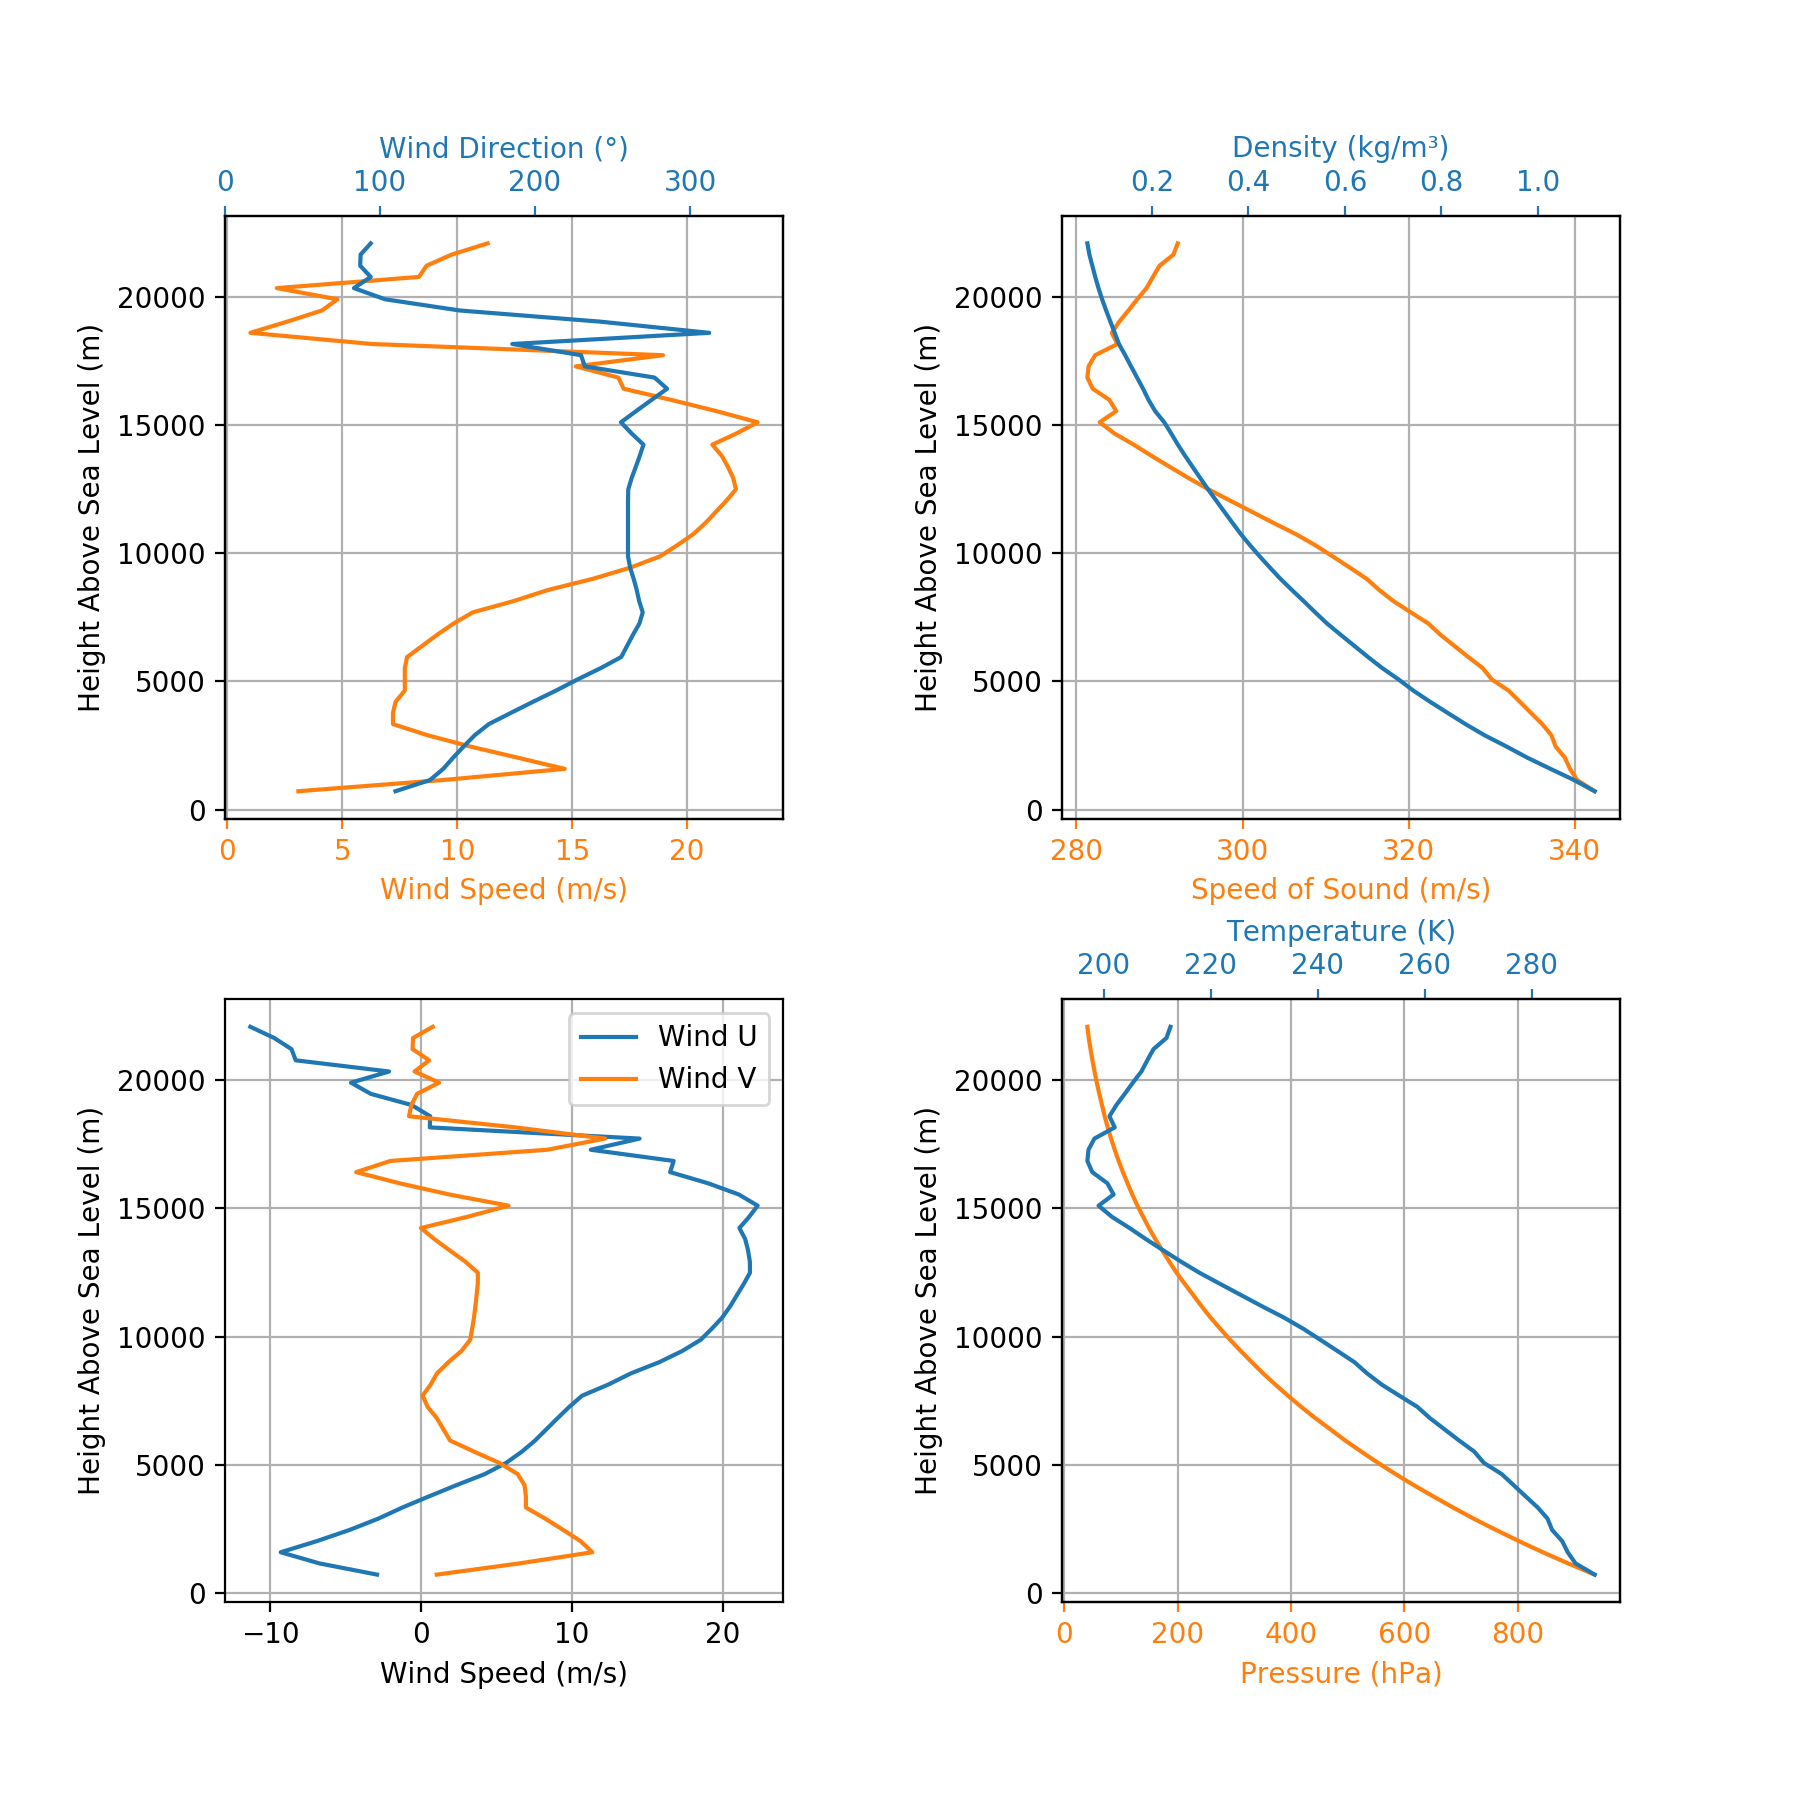

In [16]:
EnvWUAS.allInfo()

### Using NOAA's Ruc Soundings
Another option for upper air soundings is [NOAA's Ruc Soundings](https://rucsoundings.noaa.gov/) servers. It allows users to download virtual soundings from numerical weather prediction models such as GFS, RAP and NAM, and also allow for the download of real soundings from the Integrated Global Radiosonde Archive (IGRA).

All of these options options can be retrieved as a text file which follows the GSD format. By generating such a file through the link above, the file's URL can be used to import the atmospheric data into RocketPy.

We will use the same sounding station as we did for Wyoming Soundings. Selecting ROABs as the initial data source, specifying the station through it's WMO-ID and opting for the ASCII (GSD format) button, the following page opens up: [https://rucsoundings.noaa.gov/get_raobs.cgi?data_source=RAOB&latest=latest&start_year=2019&start_month_name=Feb&start_mday=5&start_hour=12&start_min=0&n_hrs=1.0&fcst_len=shortest&airport=83779&text=Ascii%20text%20%28GSD%20format%29&hydrometeors=false&start=latest](https://rucsoundings.noaa.gov/get_raobs.cgi?data_source=RAOB&latest=latest&start_year=2019&start_month_name=Feb&start_mday=5&start_hour=12&start_min=0&n_hrs=1.0&fcst_len=shortest&airport=83779&text=Ascii%20text%20%28GSD%20format%29&hydrometeors=false&start=latest)

Let's initialize a new Environment to use this as it's source for atmospheric conditions. There is no need to specify dates, latitude and longitude here as well, so we will skip them for know.

In [17]:
EnvRUC = Environment(railLength=5)

In [18]:
URL = 'https://rucsoundings.noaa.gov/get_raobs.cgi?data_source=RAOB&latest=latest&start_year=2019&start_month_name=Feb&start_mday=5&start_hour=12&start_min=0&n_hrs=1.0&fcst_len=shortest&airport=83779&text=Ascii%20text%20%28GSD%20format%29&hydrometeors=false&start=latest'

EnvRUC.setAtmosphericModel(type='NOAARucSounding', file=URL)

Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5  m
Launch Site Surface Elevation:  722.0  m


Atmospheric Model Details

Atmospheric Model Type:  NOAARucSounding
NOAARucSounding Maximum Height: 22.250 km


Atmospheric Model Plots


<IPython.core.display.Javascript object>


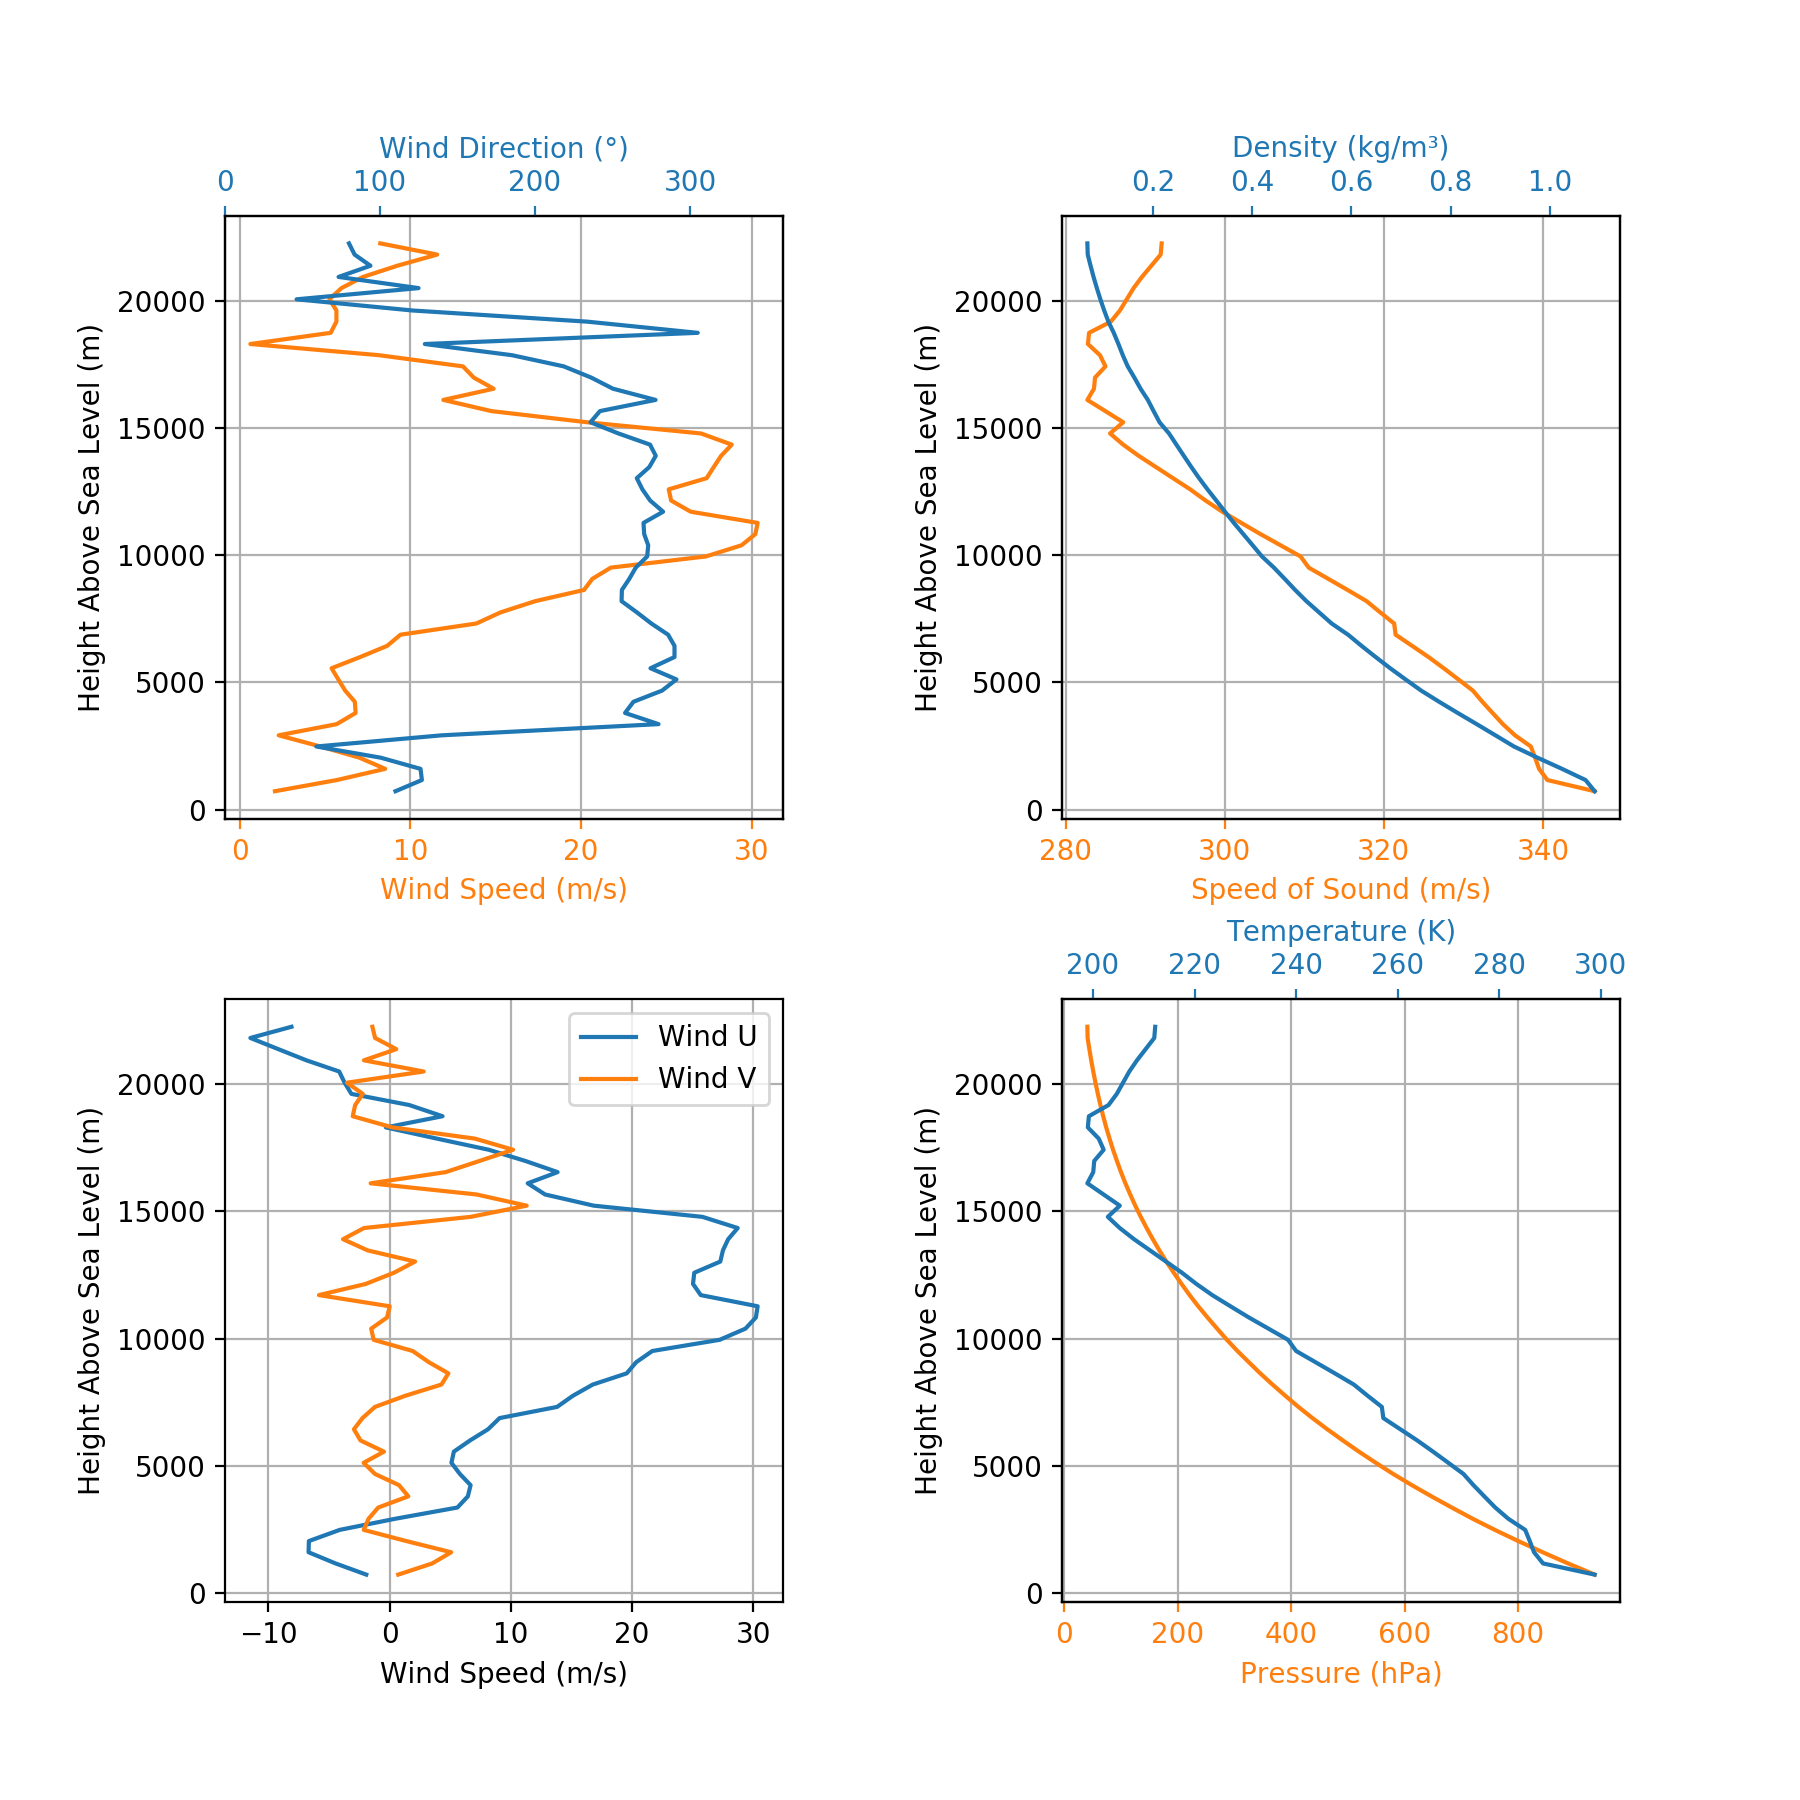

In [19]:
EnvRUC.allInfo()

### Using Weather Forecasts and Reanalysis

Weather Forecasts and Reanalysis can also be used to set the atmospheric model. Here we will showcase how to import global forecasts such as GFS and FV3 and also local forecasts such as NAM and RAP for North America, all of these available through OPeNDAP in the [NOAA's NCEP NOMADS](http://nomads.ncep.noaa.gov/) website. Keep in mind that other generic forecasts can also be imported.

Furthermore, reanalysis such as ERA5, which can be easily downloaded from [ECMWF's Climate Data Store](https://cds.climate.copernicus.eu/#!/home), will also be showcased.

#### Setting up Date, Latitude and Longitude

All Environments which use weather forecasts or reanalysis must have date, latitude and longitude set up correctly during or after initialization in order for everything to work smoothly.

Let's first intialize a new Environment for the GFS weather forecast by specifying date, latitude and longitude during initialization. Keep in mind that date is specified using UTC time in year, month, day, UTC hour format.

In [15]:
EnvGFS = Environment(railLength=5,
                     date=(2019, 2, 10, 18),
                     latitude=-21.960641,
                     longitude=-47.482122)

Another approach is to specify date, latitude and longitude values after initialization. Let's do this when creating a new Environment instance that will be using the FV3 weather forecast.

In [16]:
EnvFV3 = Environment(railLength=5)

In [17]:
EnvFV3.setDate((2019, 2, 10, 18))

In [18]:
EnvFV3.setLocation(-21.960641, -47.482122)

#### GFS

Using the latest forecast from GFS is really simple. All we need to do is specify that GFS is the forecast we want. Note that since data is downloaded from NOMADS server, this line of code can take longer than usual.

In [19]:
EnvGFS.setAtmosphericModel(type='Forecast', file='GFS')

Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2019-02-10 18:00:00  UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Launch Site Surface Elevation: 622.2 m


Atmospheric Model Details

Atmospheric Model Type:  Forecast
Forecast Maximum Height: 48.207 km
Forecast Time Period: From  2019-02-06 06:00:00  to  2019-02-16 06:00:00  UTC
Forecast Hour Interval:  3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Atmospheric Model Plots


<IPython.core.display.Javascript object>


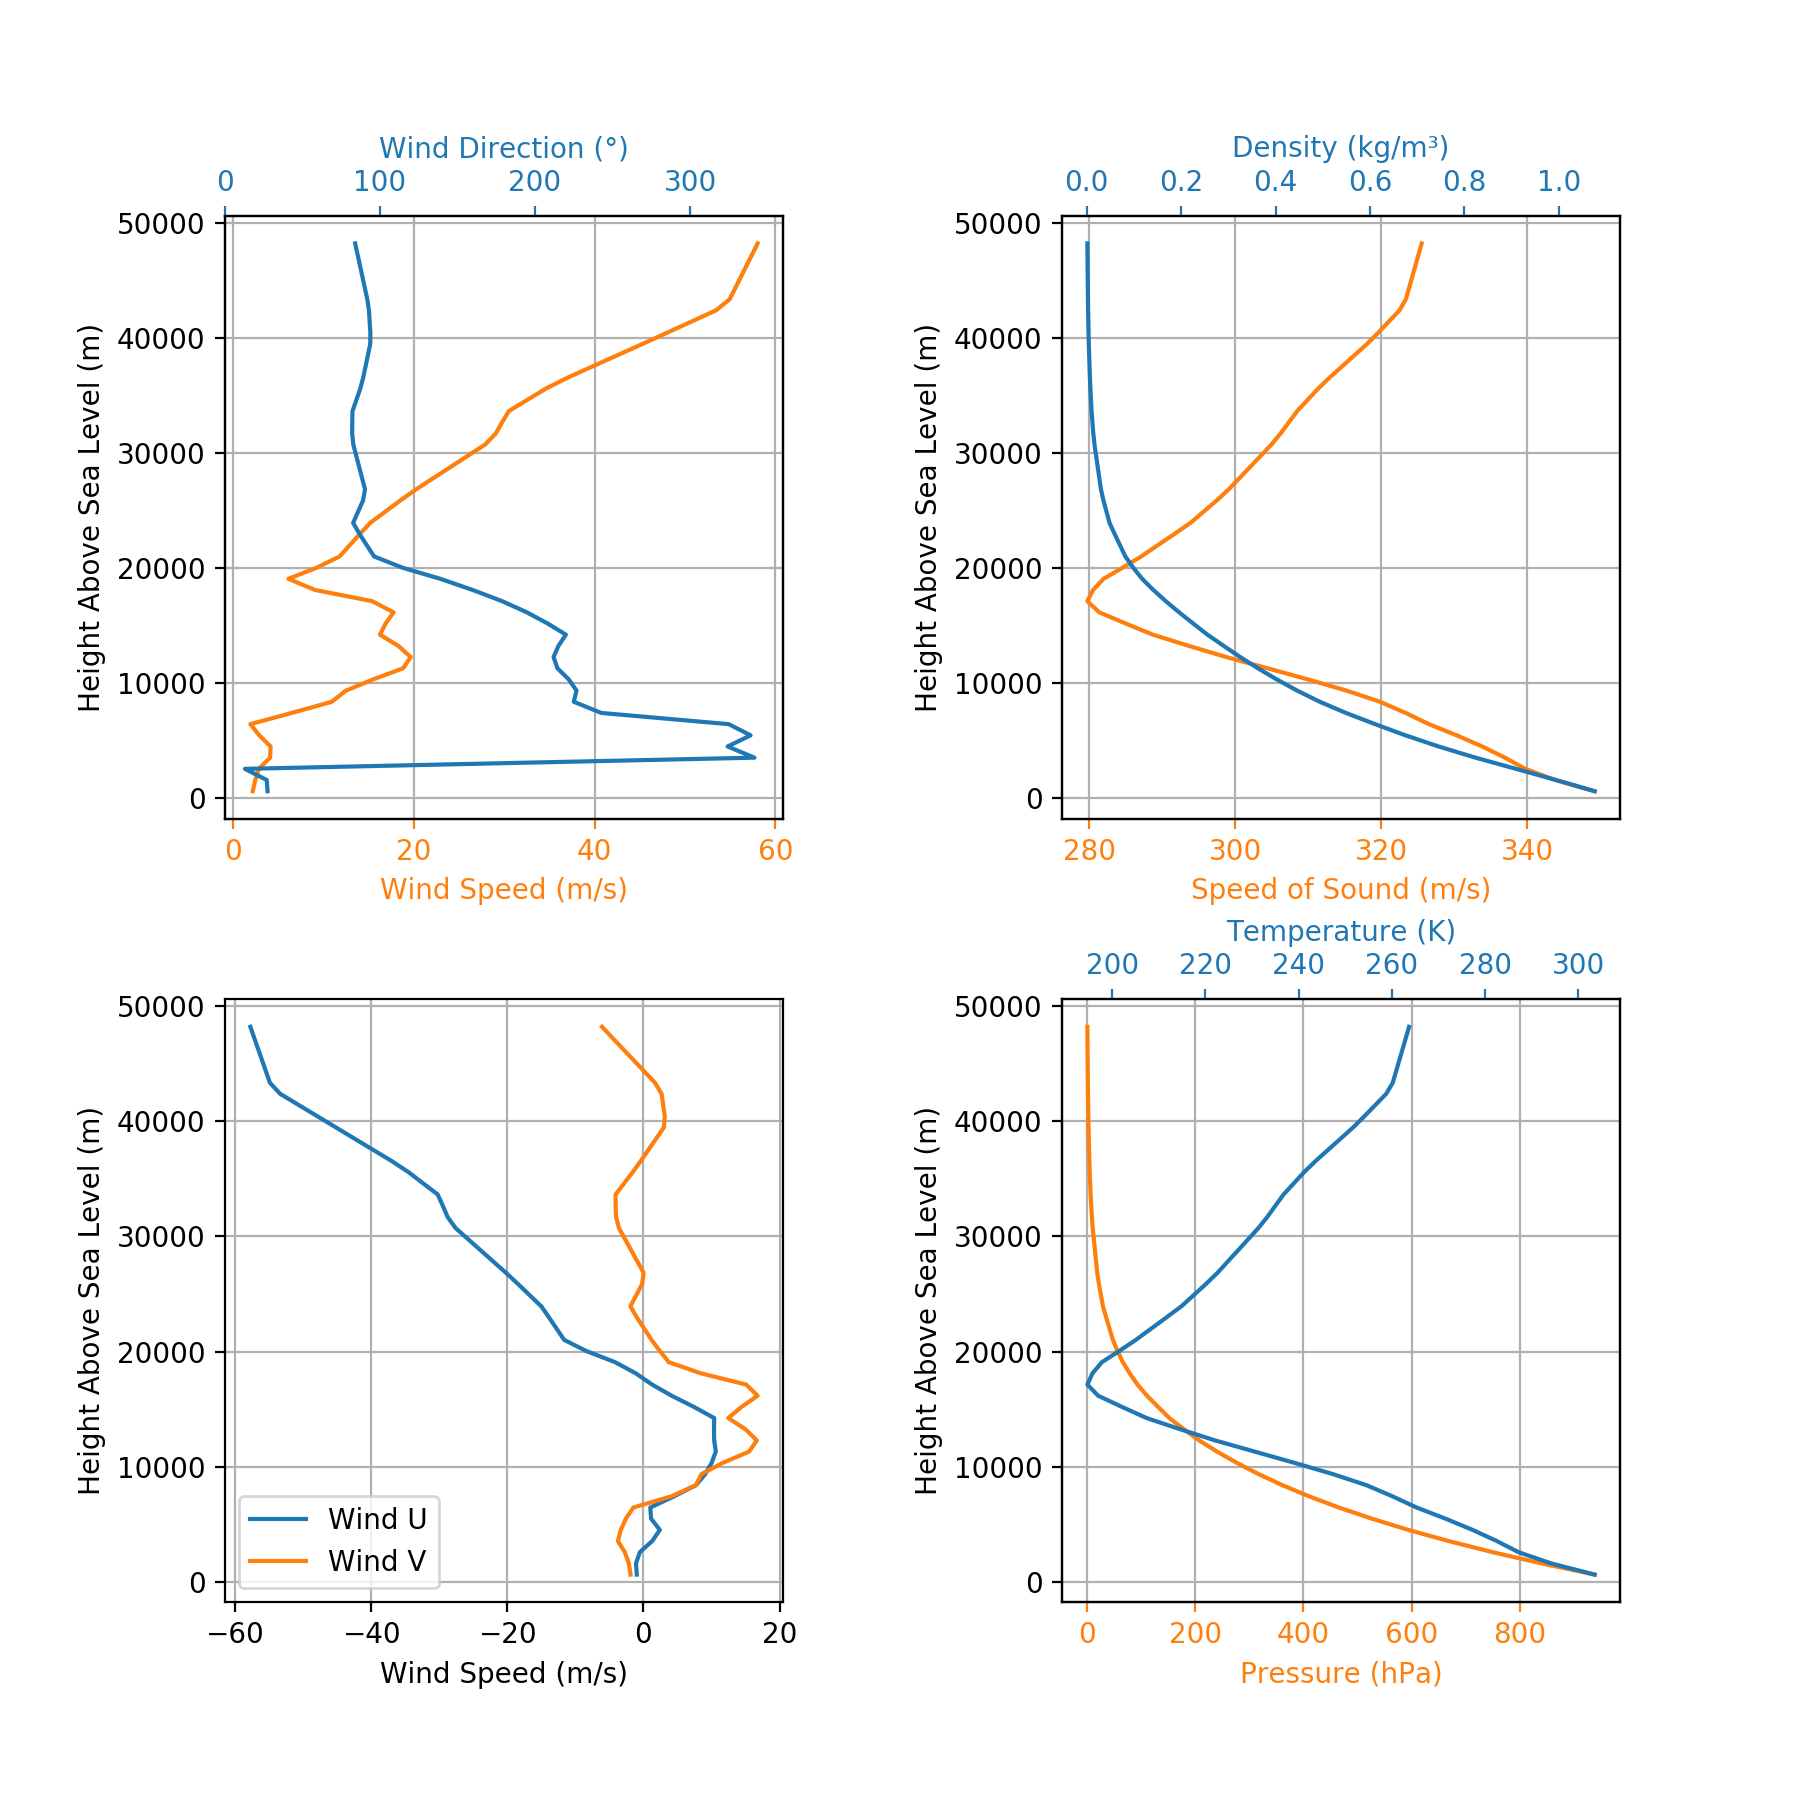

In [20]:
EnvGFS.allInfo()

#### FV3

Using the latest forecast from FV3 is just as simple as was for GFS.

In [21]:
EnvFV3.setAtmosphericModel(type='Forecast', file='FV3')

C:\Users\ghceo\OneDrive\Projects\RocketPy\nbks\rocketpyAlpha.py:3324: UserWarning: Some values were missing from this weather dataset, therefore, certain pressure levels were removed.
  warnings.warn('Some values were missing from this weather dataset, therefore, certain pressure levels were removed.')


Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2019-02-10 18:00:00  UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Launch Site Surface Elevation: 671.2 m


Atmospheric Model Details

Atmospheric Model Type:  Forecast
Forecast Maximum Height: 55.526 km
Forecast Time Period: From  2019-02-06 06:00:00  to  2019-02-22 06:00:00  UTC
Forecast Hour Interval:  3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Atmospheric Model Plots


<IPython.core.display.Javascript object>


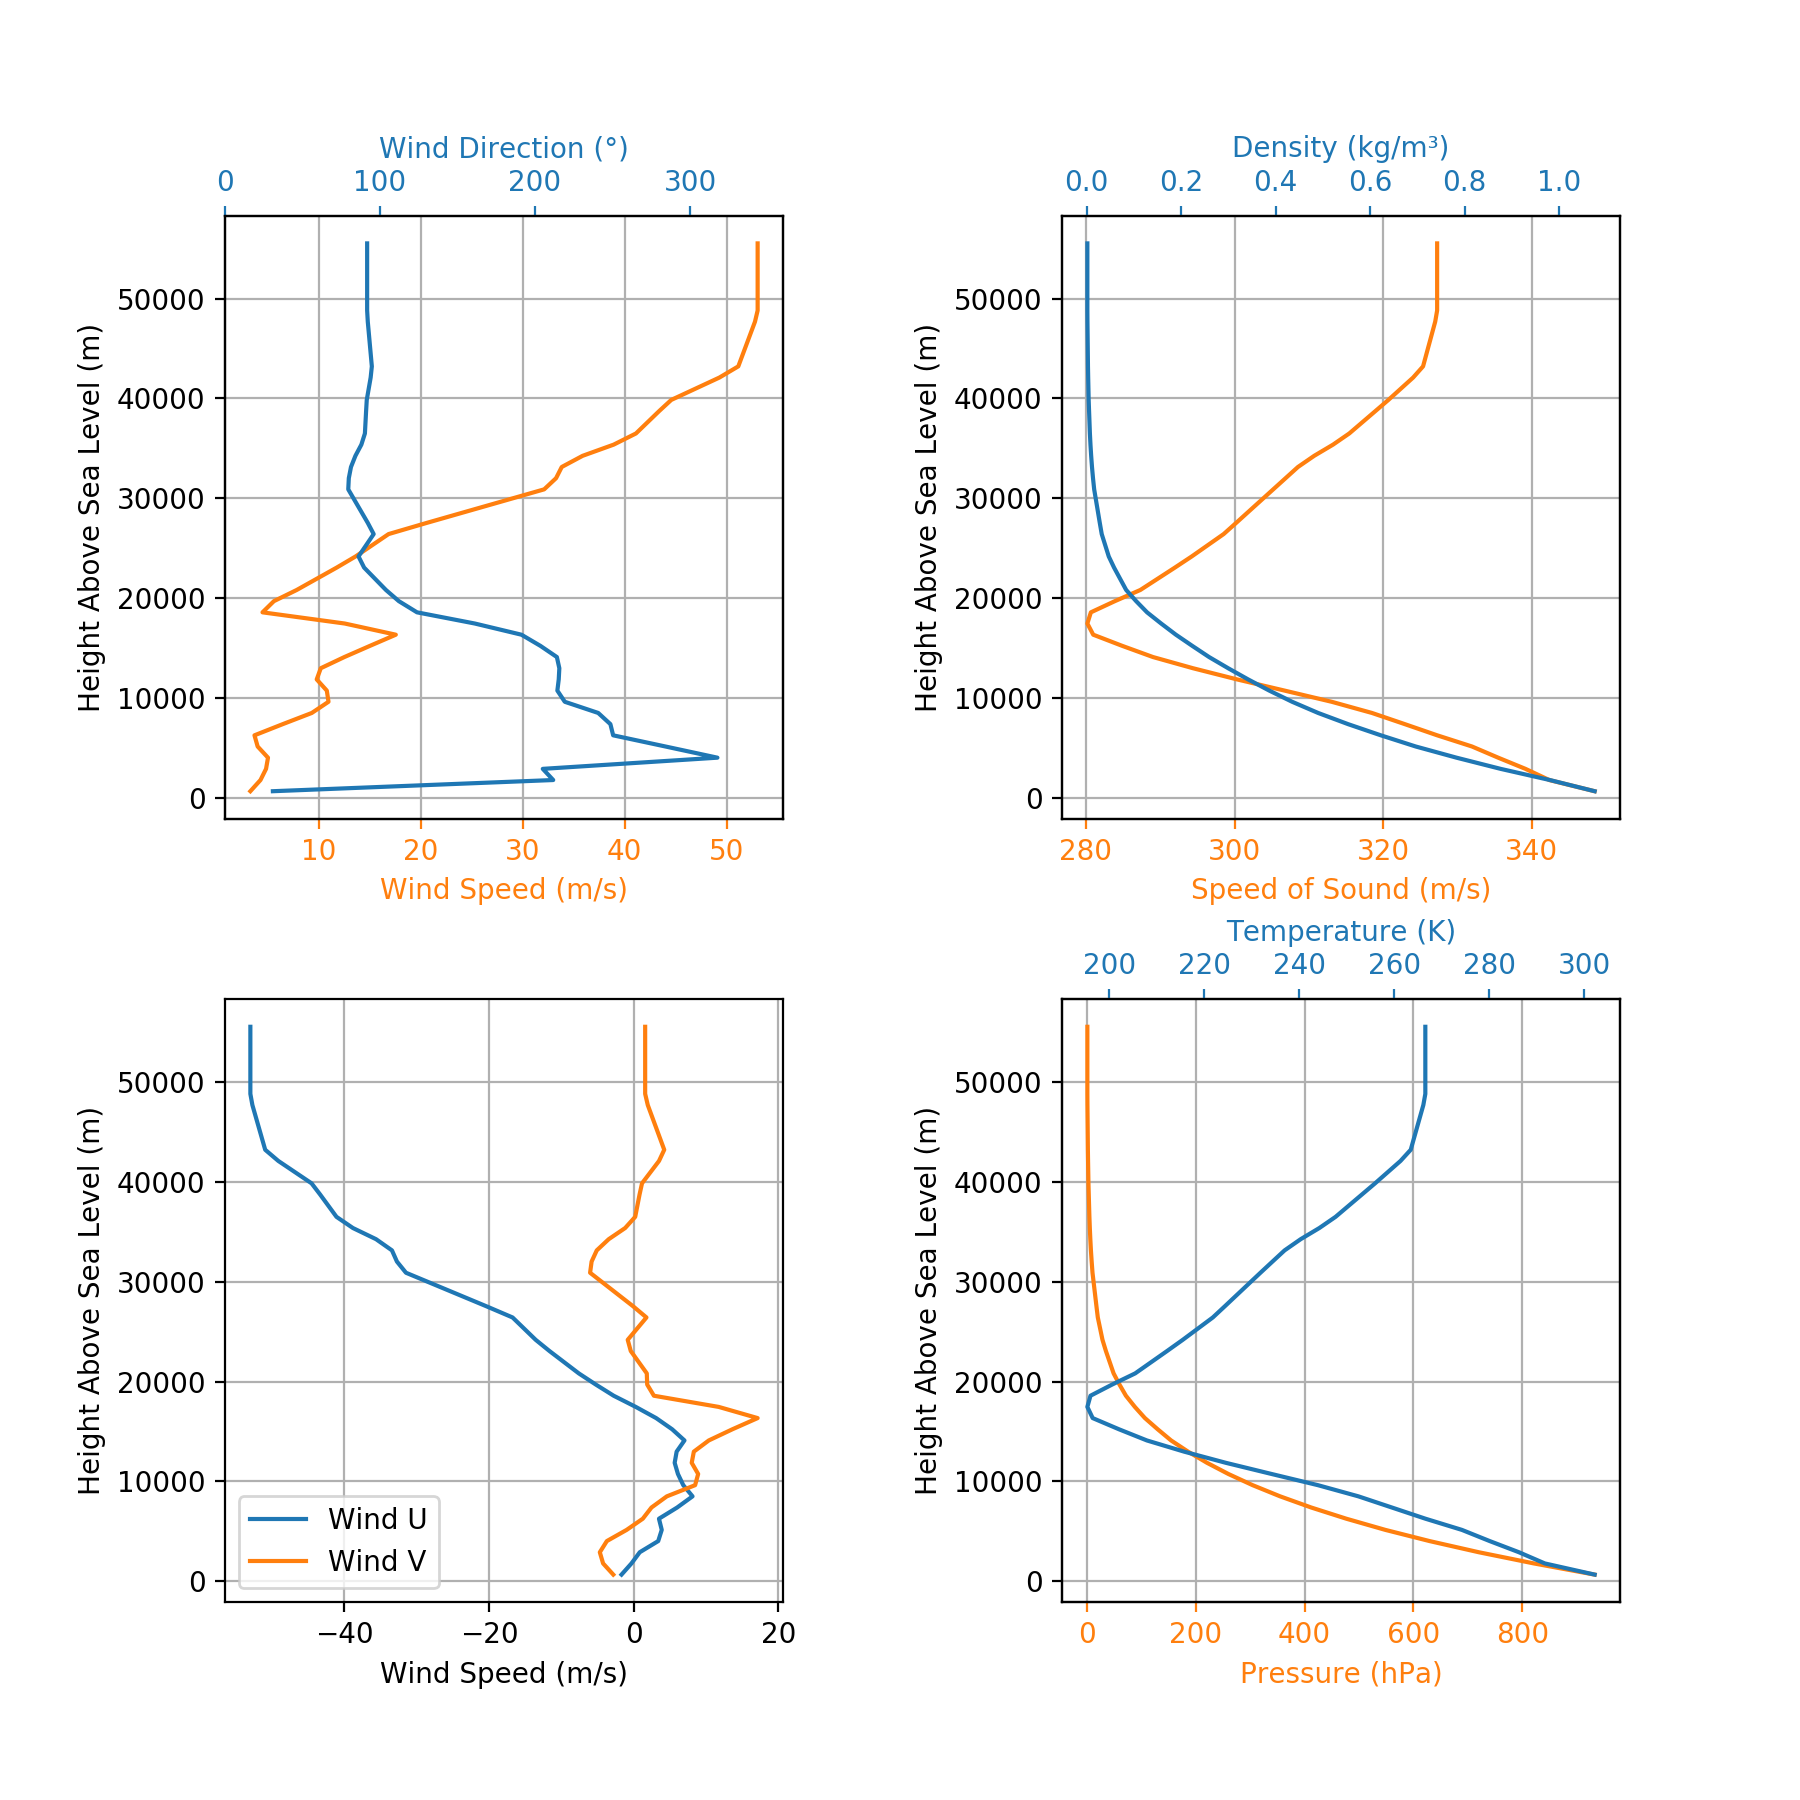

In [23]:
EnvFV3.allInfo()

#### NAM and RAP

We can also request the latest forecasts from NAM and RAP. Since they are regional models for North America, we need to speciy latitude and longitude points in North America. We will use [SpacePort America](https://www.google.com/maps/place/32°59'18.7%22N+106°58'30.2%22W/@32.9885323,-106.9772443,800m/data=!3m2!1e3!4b1!4m13!1m6!3m5!1s0x86df9591b4145bf9:0x19c787f1198f25cf!2sSpaceport+America!8m2!3d32.9903796!4d-106.975041!3m5!1s0x0:0x0!7e2!8m2!3d32.9885168!4d-106.9750625) for this, represented by coordinates 32.988528, -106.975056 or 32°59'18.7"N 106°58'30.2"W.

In [26]:
EnvNAM = Environment(railLength=5,
                     date=(2019, 2, 7, 0),
                     latitude=32.988517, 
                     longitude=-106.975062)

EnvRAP = Environment(railLength=5,
                     date=(2019, 2, 7, 0),
                     latitude=32.988517, 
                     longitude=-106.975062)

In [27]:
EnvNAM.setAtmosphericModel(type='Forecast', file='NAM')

EnvRAP.setAtmosphericModel(type='Forecast', file='RAP')

Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2019-02-07 00:00:00  UTC
Launch Site Latitude: 32.98852°
Launch Site Longitude: -106.97506°
Launch Site Surface Elevation: 1415.4 m


Atmospheric Model Details

Atmospheric Model Type:  Forecast
Forecast Maximum Height: 30.858 km
Forecast Time Period: From  2019-02-06 12:00:00  to  2019-02-09 00:00:00  UTC
Forecast Hour Interval:  3  hrs
Forecast Latitude Range: From  21.140671 ° To  52.61339827273 °
Forecast Longitude Range: From  -134.096127 ° To  -60.93723597484 °


Atmospheric Model Plots


<IPython.core.display.Javascript object>


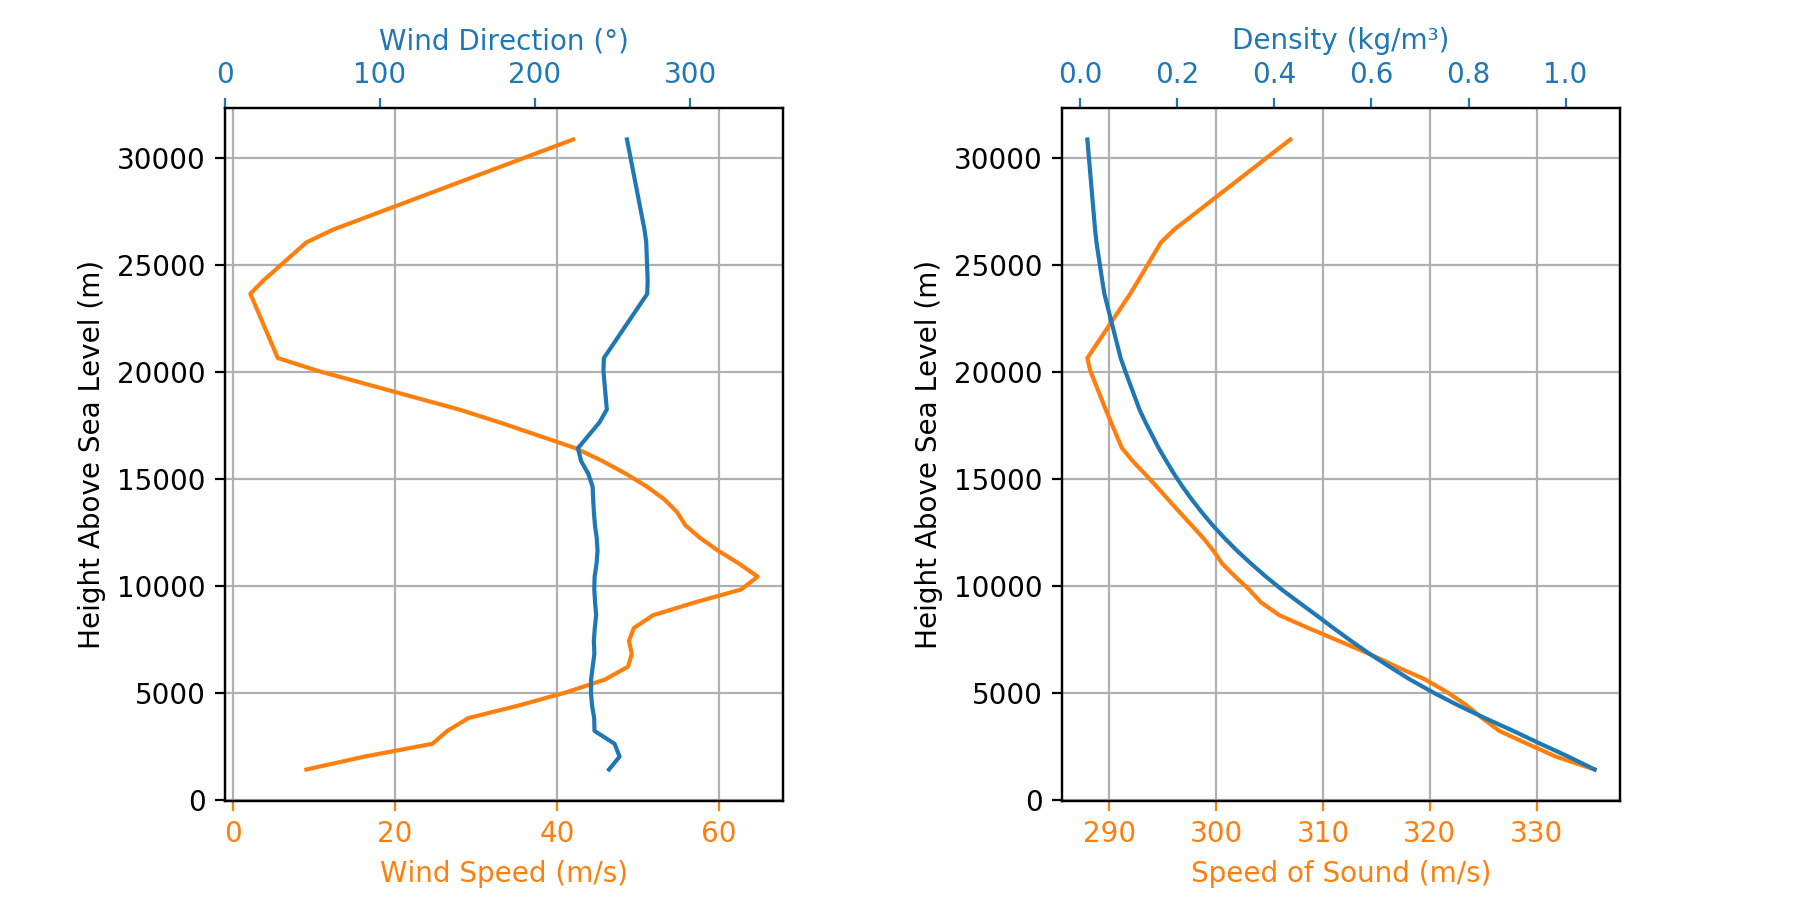

In [28]:
EnvNAM.info()

Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2019-02-07 00:00:00  UTC
Launch Site Latitude: 32.98852°
Launch Site Longitude: -106.97506°
Launch Site Surface Elevation: 1490.7 m


Atmospheric Model Details

Atmospheric Model Type:  Forecast
Forecast Maximum Height: 16.276 km
Forecast Time Period: From  2019-02-06 15:00:00  to  2019-02-08 06:00:00  UTC
Forecast Hour Interval:  1  hrs
Forecast Latitude Range: From  16.322011 ° To  58.25097463636 °
Forecast Longitude Range: From  -139.856603 ° To  -57.49840949379 °


Atmospheric Model Plots


<IPython.core.display.Javascript object>


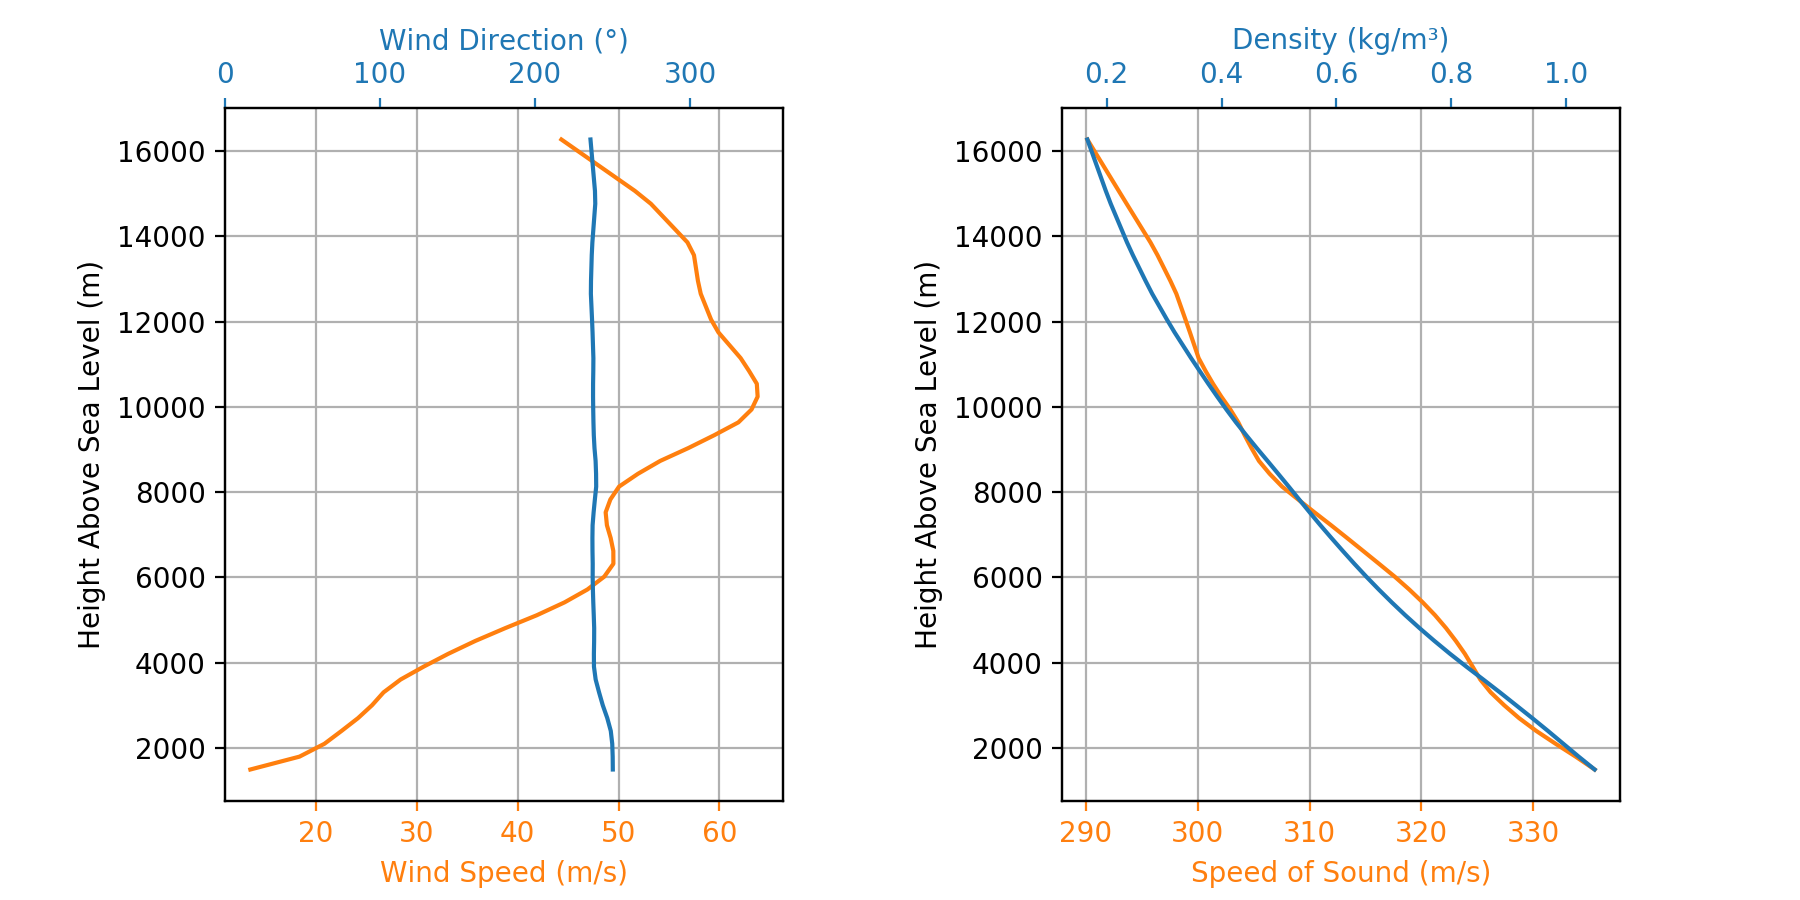

In [29]:
EnvRAP.info()

#### ERA-5 Reanalysis

Using data from ERA-5 reanalysis is as simple as specifying the file location and the dictionary to be used. This is much faster since the data has already been downloaded and is stored locally.

In [58]:
EnvERA = Environment(railLength=5,
                     date=(2018, 2, 17, 18),
                     latitude=-21.960641,
                     longitude=-47.482122,
                     elevation=640)

In [59]:
EnvERA.setAtmosphericModel(type='Reanalysis',
                           file='../data/weather/CuritibaRioSaoPaulo_2018_ERA-5.nc',
                           dictionary='ECMWF')

Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2018-02-17 18:00:00  UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Launch Site Surface Elevation: 640.0 m


Atmospheric Model Details

Atmospheric Model Type:  Reanalysis
Reanalysis Maximum Height: 4.427 km
Reanalysis Time Period: From  2018-01-01 00:00:00  to  2018-12-31 18:00:00  UTC
Reanalysis Hour Interval:  6  hrs
Reanalysis Latitude Range: From  -19.5 ° To  -26.0 °
Reanalysis Longitude Range: From  306.0 ° To  320.25 °


Atmospheric Model Plots


<IPython.core.display.Javascript object>


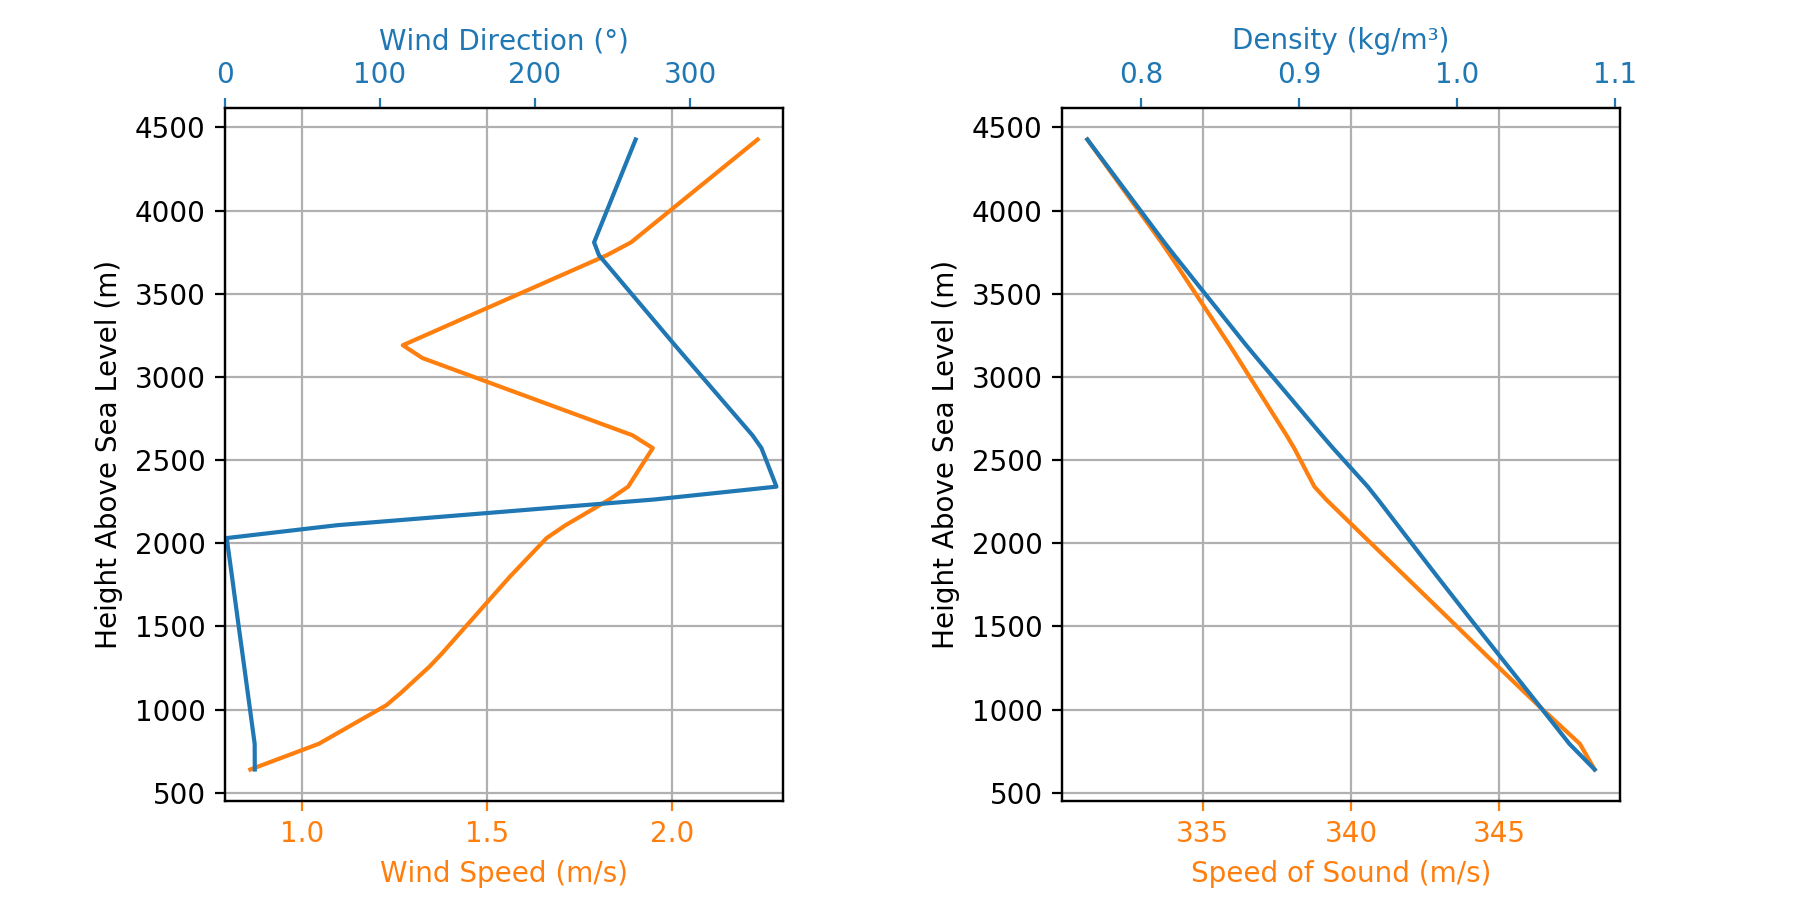

In [60]:
EnvERA.info()

#### Other Weather Forecasts or Reanalysis - HIRESW

We can use other forecasts or reanalysis as well. As an example, we will use the [HIRESW CONUS](http://nomads.ncep.noaa.gov/txt_descriptions/HIRES_doc.shtml) forecast available at [NOAA's NCEP NOMADS](http://nomads.ncep.noaa.gov/) website.

In [31]:
EnvHIRESW = Environment(railLength=5,
                        date=(2019, 2, 7, 0),
                        latitude=32.988517, 
                        longitude=-106.975062)

This model can be accessed through the following link: [https://nomads.ncep.noaa.gov:9090/dods/hiresw/hiresw20190206/hiresw_conusarw_12z](https://nomads.ncep.noaa.gov:9090/dods/hiresw/hiresw20190206/hiresw_conusarw_12z).

Since it is avaible from NOAA's NCEP NOMADS, we could use the NOAA dictionary However, we will create one from scratch to showcase the methodology.

The variables from the dataset can also be seen through the link above. We need to determine the name used by the model of the following dimensions and variables:

- Time
- Latitude
- Longitude
- Pressure Levels
- Geopotential Height (as a function of Time, Pressure Levels, Latitude and Longitude)
- Surface Geopotential Height (as a function of Time, Latitude and Longitude)
- Wind - U Component (as a function of Time, Pressure Levels, Latitude and Longitude)
- Wind - V Component (as a function of Time, Pressure Levels, Latitude and Longitude)

Looking through the variable list in the link above, we find the following correspondence:

- Time = **'time'**
- Latitude = **'lat'**
- Longitude = **'lon'**
- Pressure Levels = **'lev'**
- Geopotential Height = **'hgtprs'**
- Surface Geopotential Height = **'hgtsfc'**
- Wind - U Component = **'ugrdprs'**
- Wind - V Component = **'vgrdprs'**

Therefore, we use the dictionary shown below.

In [39]:
HIRESW_dictionary = {'time': 'time', 'latitude': 'lat', 'longitude': 'lon', 
                     'level': 'lev', 'temperature': 'tmpprs',
                     'surface_geopotential_height': 'hgtsfc',
                     'geopotential_height': 'hgtprs',
                     'u_wind': 'ugrdprs', 'v_wind': 'vgrdprs'}

This dictionary can then be used in the Environment.setAtmosphericModel method.

In [40]:
EnvHIRESW.setAtmosphericModel(type='Forecast',
                              file='https://nomads.ncep.noaa.gov:9090/dods/hiresw/hiresw20190206/hiresw_conusarw_12z',
                              dictionary=HIRESW_dictionary)

Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2019-02-07 00:00:00  UTC
Launch Site Latitude: 32.98852°
Launch Site Longitude: -106.97506°
Launch Site Surface Elevation: 1414.5 m


Atmospheric Model Details

Atmospheric Model Type:  Forecast
Forecast Maximum Height: 11.853 km
Forecast Time Period: From  2019-02-06 12:00:00  to  2019-02-08 12:00:00  UTC
Forecast Hour Interval:  1  hrs
Forecast Latitude Range: From  12.202469 ° To  61.23790536364 °
Forecast Longitude Range: From  -152.852997 ° To  -49.40219446122 °


Atmospheric Model Plots


<IPython.core.display.Javascript object>


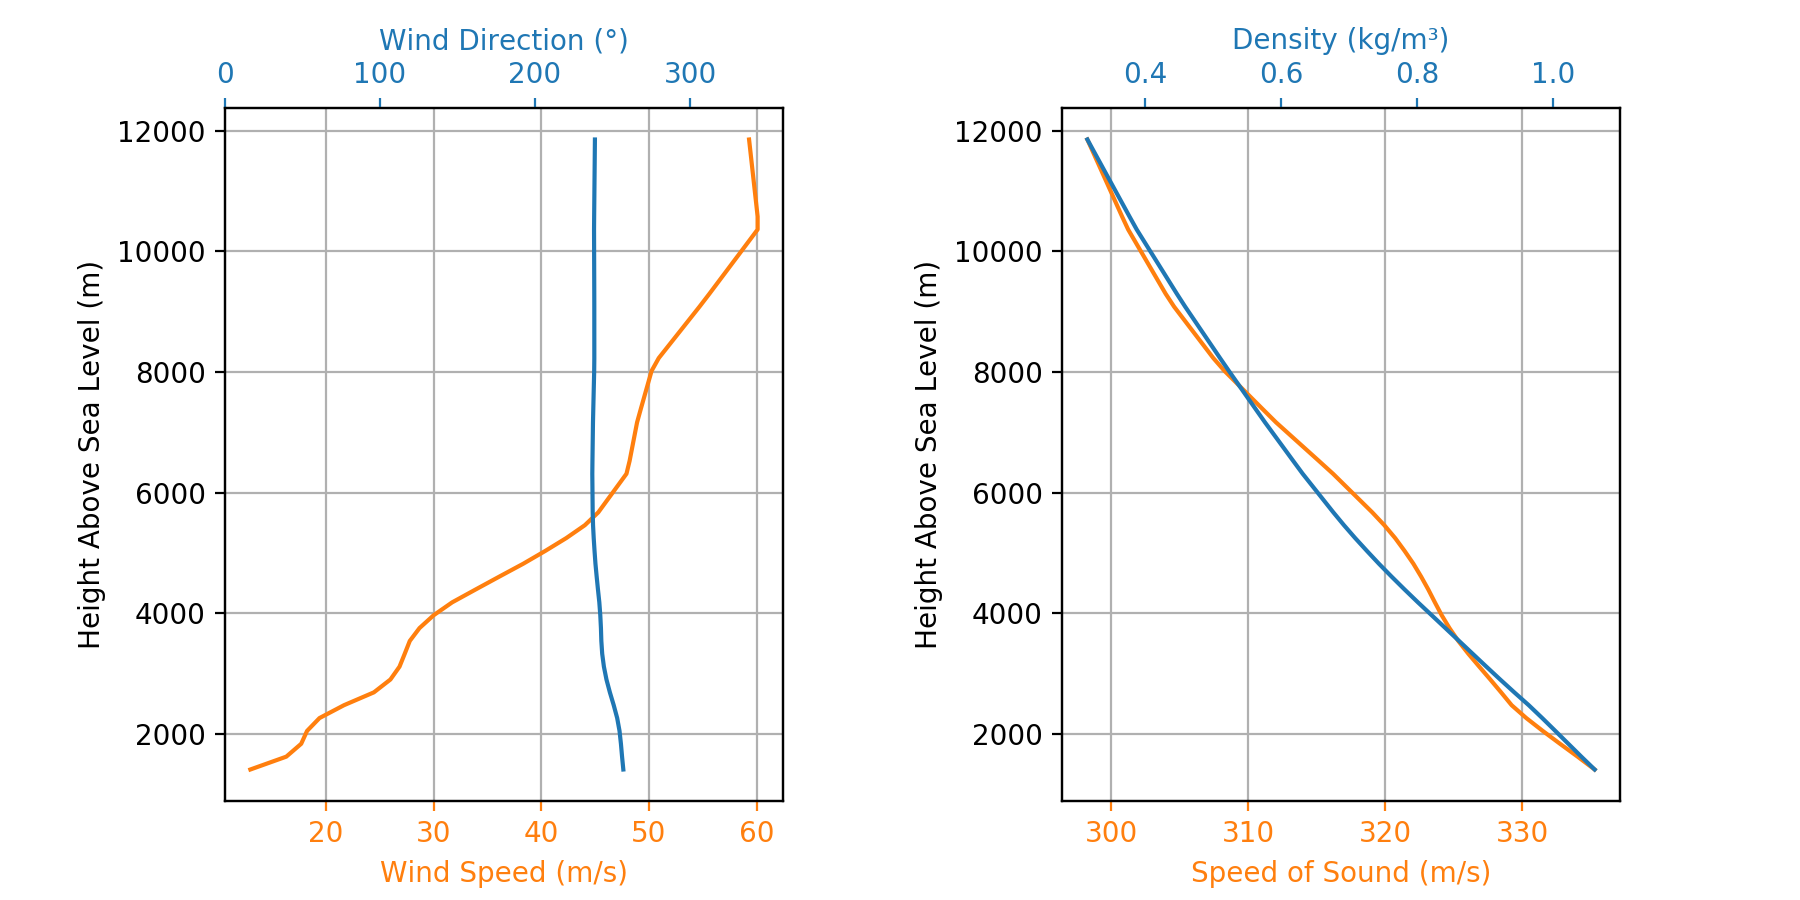

In [41]:
EnvHIRESW.info()

### Using Ensemble Forecasts and Reanalysis

Ensemble weather forecasts and reanalysis can also be imported. Since ensembles are just a gathering of multiple weather predictions, they are great for dispersion analysis and Monte Carlo simulations. One member forecast of the ensemble can be selected to run each flight simulation.

Two global ensembles are available by default: GEFS and CMC Ensemble, but others can also be used. To showcase another example, an ERA5 Reanalysis ensemble will also be shown.

#### GEFS

In [48]:
EnvGEFS = Environment(railLength=5,
                      date=(2019, 2, 17, 18),
                      latitude=-21.960641,
                      longitude=-47.482122,
                      elevation=640)

In [49]:
EnvGEFS.setAtmosphericModel(type='Ensemble', file='GEFS')

By default, the 0th forecast member is activated, which means that using EnvGFS will be exactly the same as using the 0th forecast member, and all other forecasts are kept away stored. Changing this is as easy as the following line of code.

In [50]:
EnvGEFS.selectEnsembleMember(1)

Now, a new forecast is active and EnvGFS behaves as if ensemble member 1 was its only forecast.

A very useful thing is to compare the forecast of all ensemble members, as well as confirming how many are there. All of this can be done by using Environment.allInfo().

Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2019-02-17 18:00:00  UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Launch Site Surface Elevation: 640.0 m


Atmospheric Model Details

Atmospheric Model Type:  Ensemble
Ensemble Maximum Height: 31.195 km
Ensemble Time Period: From  2019-02-06 18:00:00  to  2019-02-22 18:00:00  UTC
Ensemble Hour Interval:  6  hrs
Ensemble Latitude Range: From  -90.0 ° To  90.0 °
Ensemble Longitude Range: From  0.0 ° To  359.5 °
Number of Ensemble Members:  21
Selected Ensemble Member:  1  (Starts from 0)


Atmospheric Model Plots


<IPython.core.display.Javascript object>


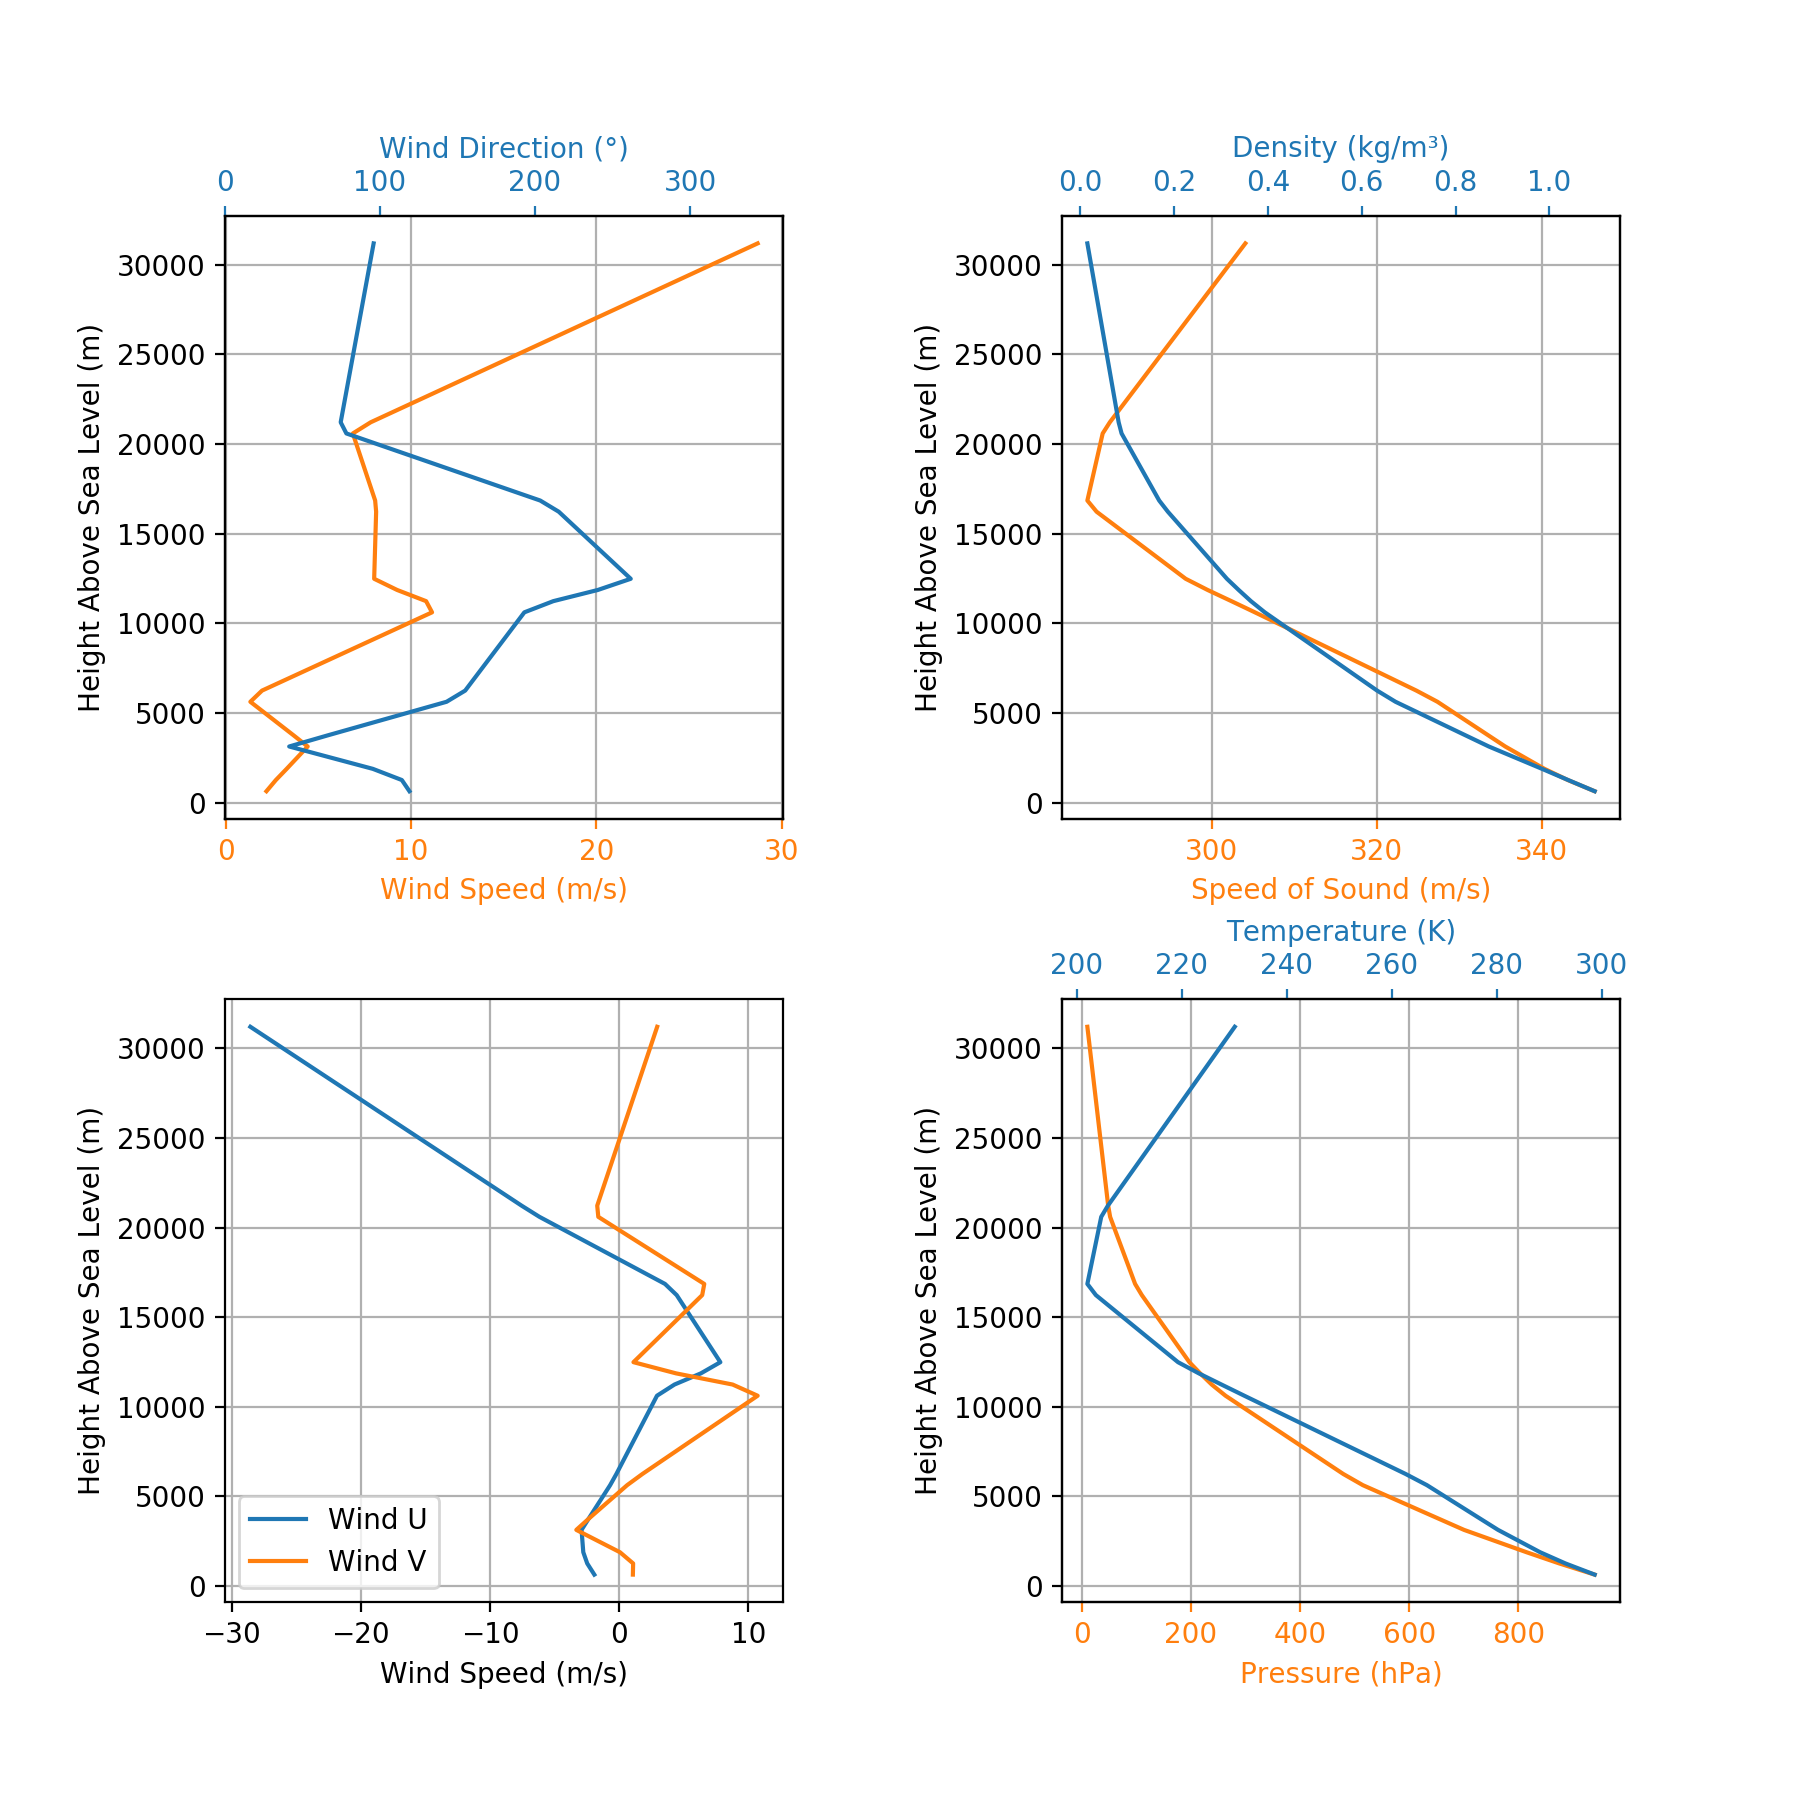



Ensemble Members Comparison


<IPython.core.display.Javascript object>


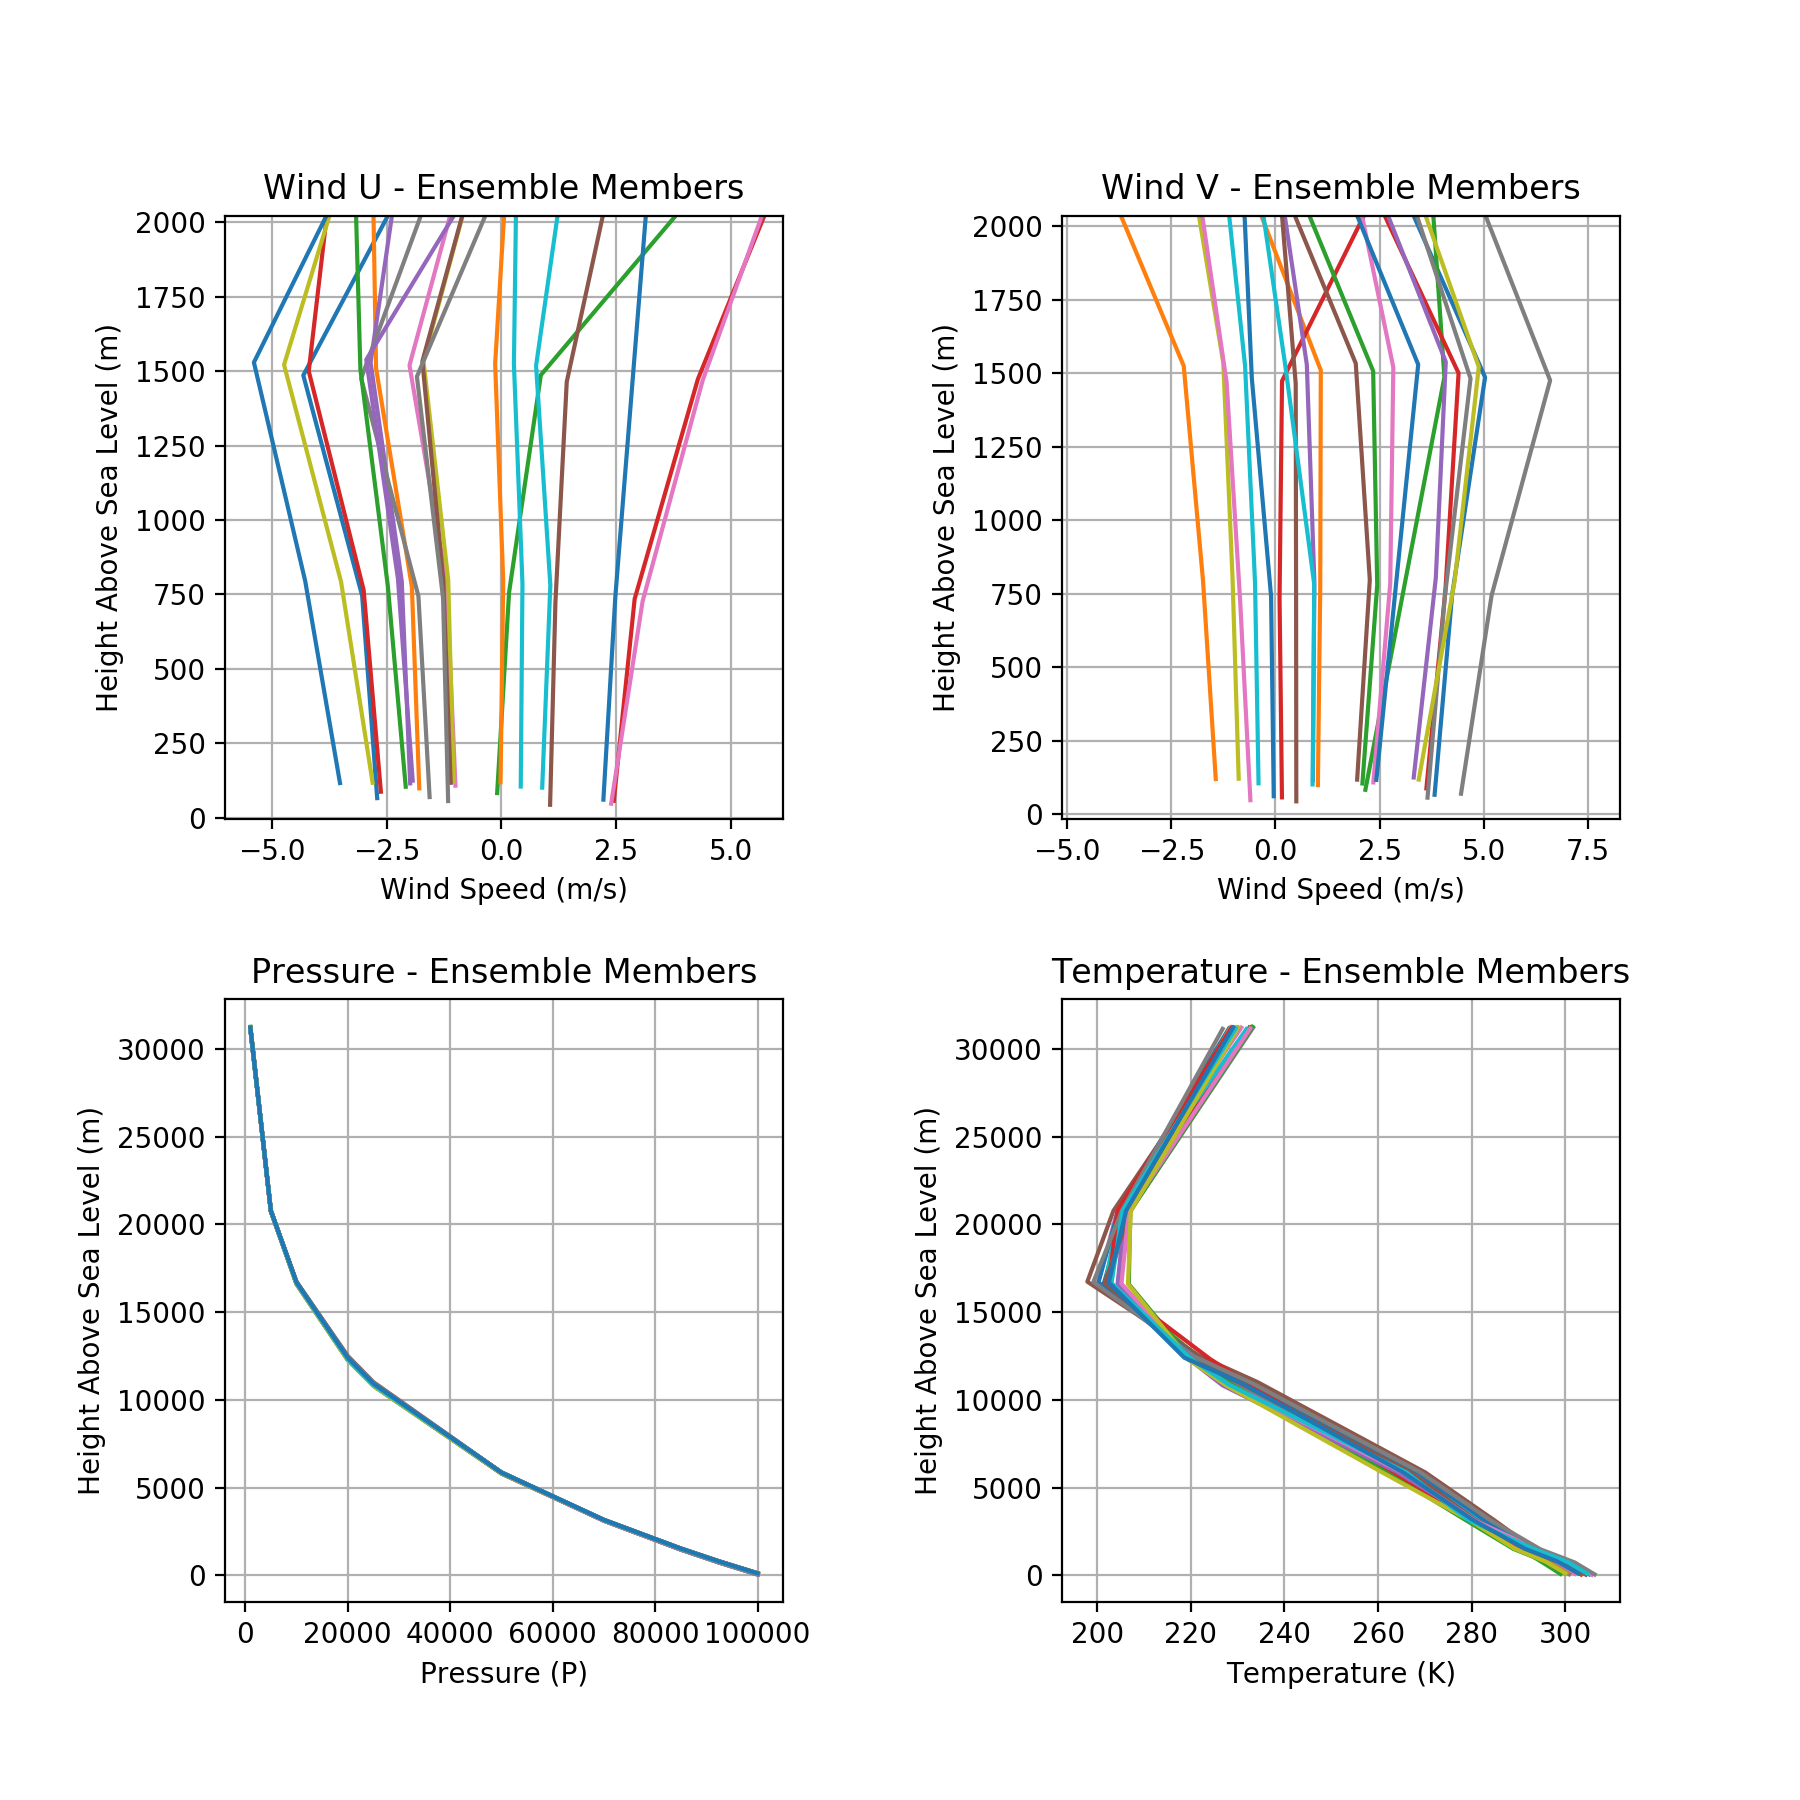

In [51]:
EnvGEFS.allInfo()

#### CMC Ensemble

In [52]:
EnvCMC = Environment(railLength=5,
                     date=(2019, 2, 17, 18),
                     latitude=-21.960641,
                     longitude=-47.482122,
                     elevation=640)

In [53]:
EnvCMC.setAtmosphericModel(type='Ensemble', file='CMC')

C:\Users\ghceo\OneDrive\Projects\RocketPy\nbks\rocketpyAlpha.py:3696: UserWarning: Some values were missing from this weather dataset, therefore, certain pressure levels were removed.
  warnings.warn('Some values were missing from this weather dataset, therefore, certain pressure levels were removed.')


Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2019-02-17 18:00:00  UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Launch Site Surface Elevation: 640.0 m


Atmospheric Model Details

Atmospheric Model Type:  Ensemble
Ensemble Maximum Height: 31.169 km
Ensemble Time Period: From  2019-02-06 12:00:00  to  2019-02-22 12:00:00  UTC
Ensemble Hour Interval:  6  hrs
Ensemble Latitude Range: From  -90.0 ° To  90.0 °
Ensemble Longitude Range: From  0.0 ° To  359.5 °
Number of Ensemble Members:  21
Selected Ensemble Member:  0  (Starts from 0)


Atmospheric Model Plots


<IPython.core.display.Javascript object>


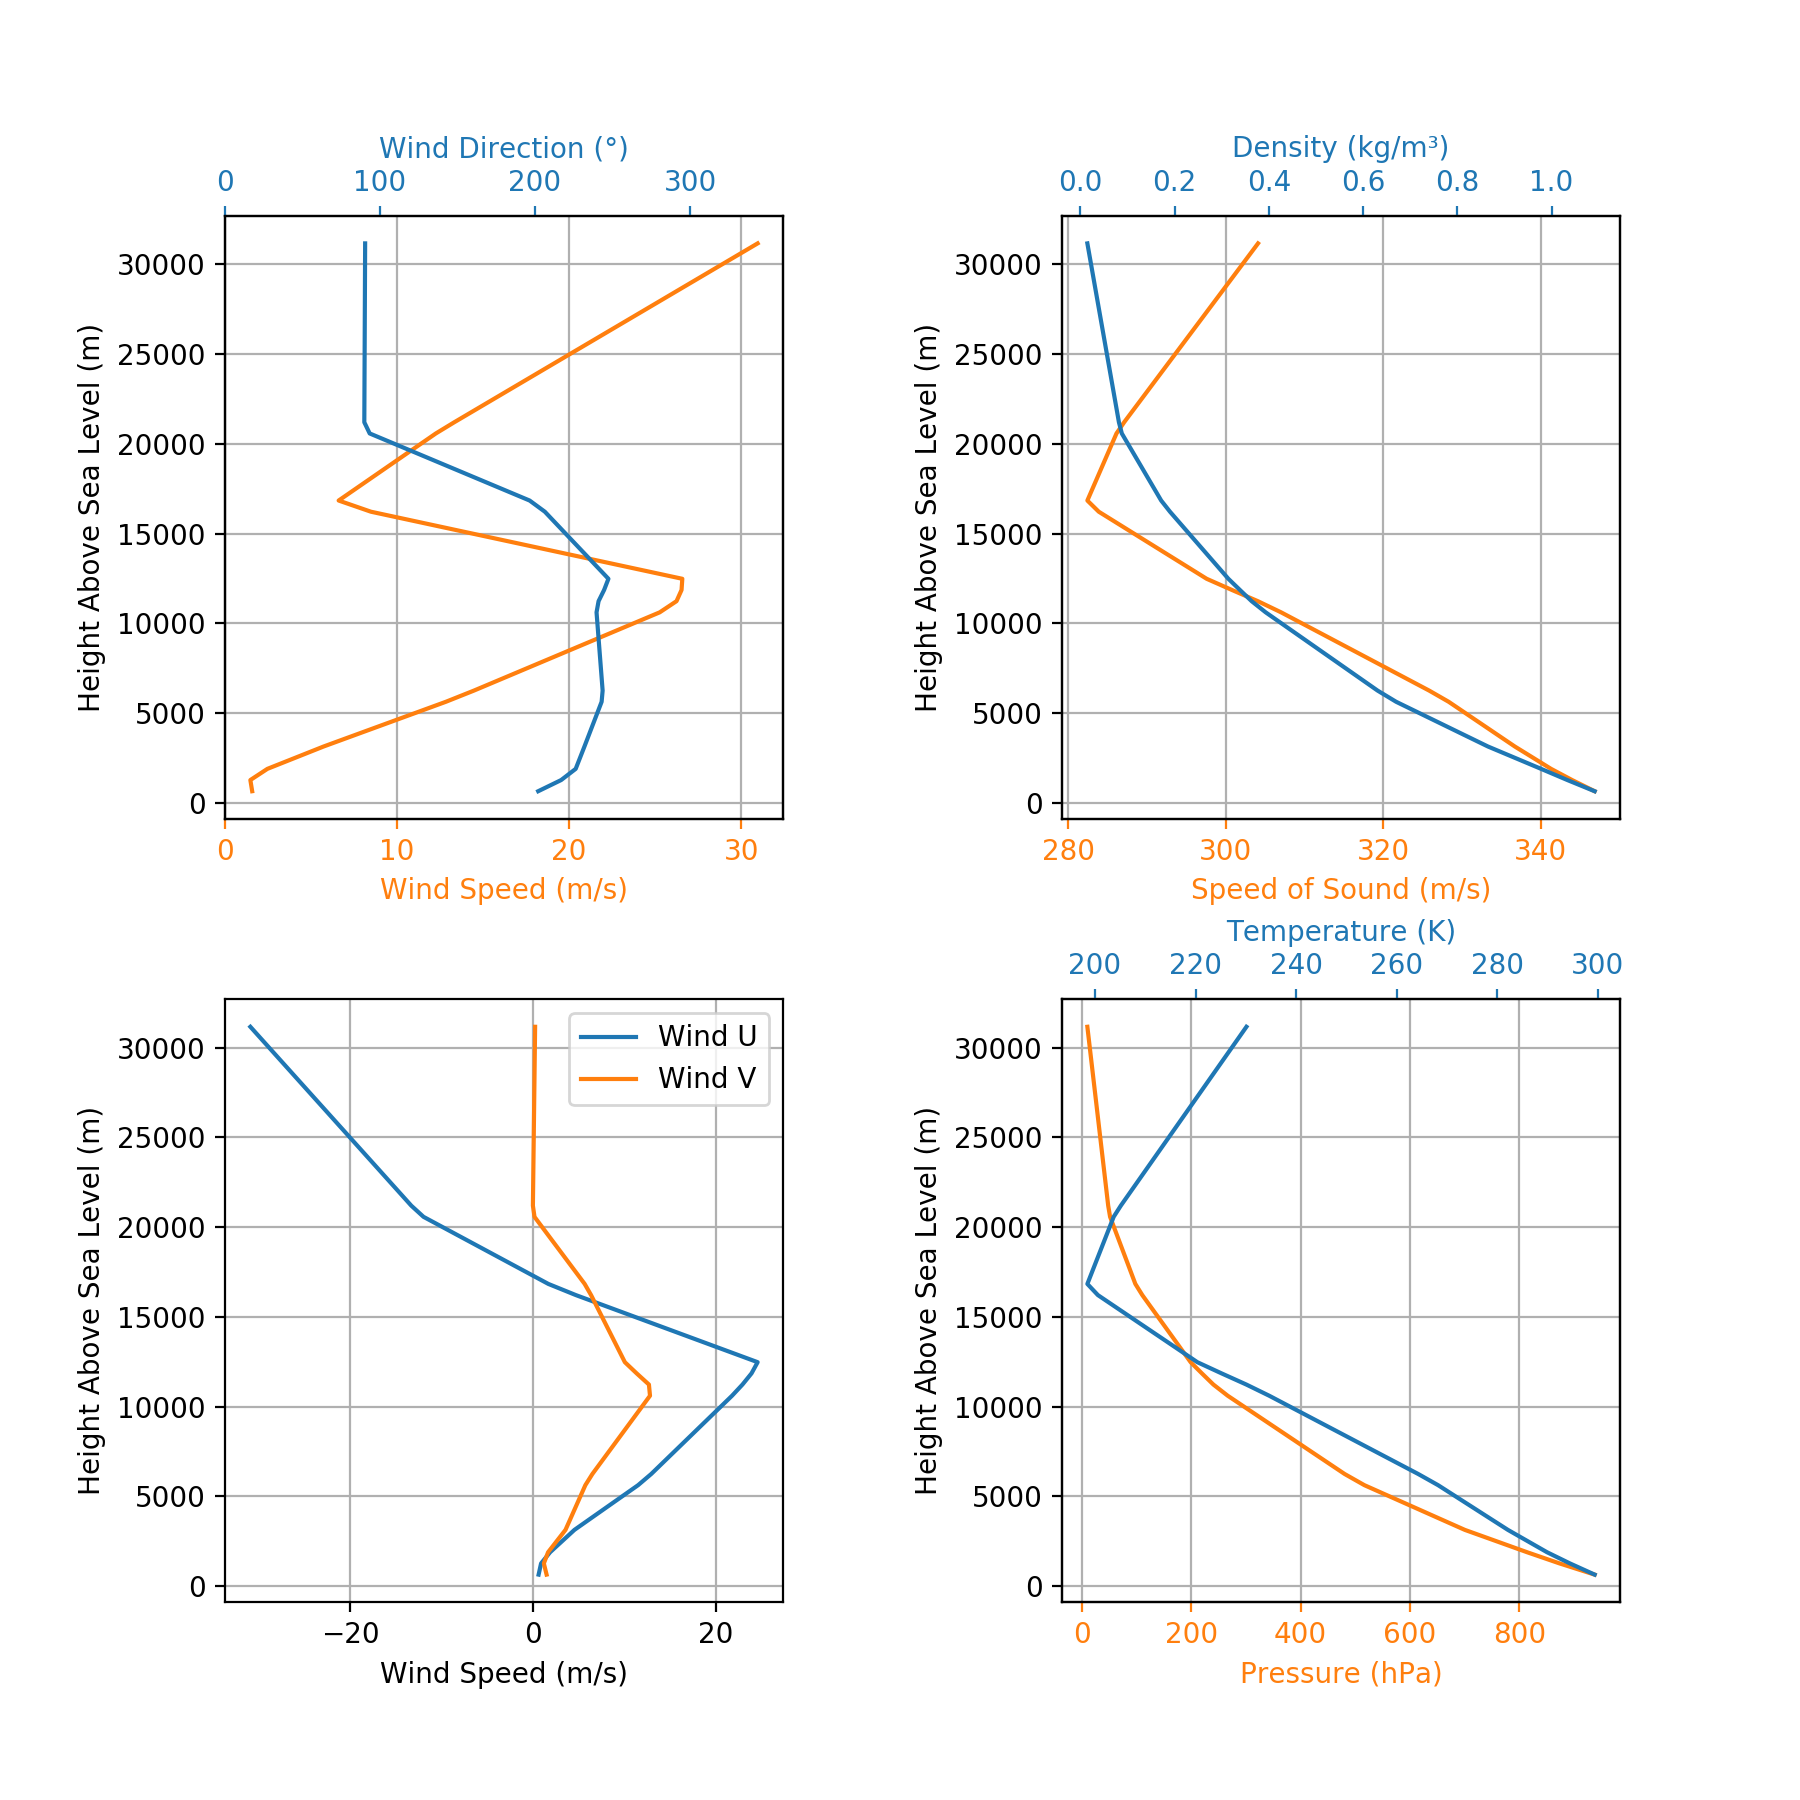



Ensemble Members Comparison


<IPython.core.display.Javascript object>


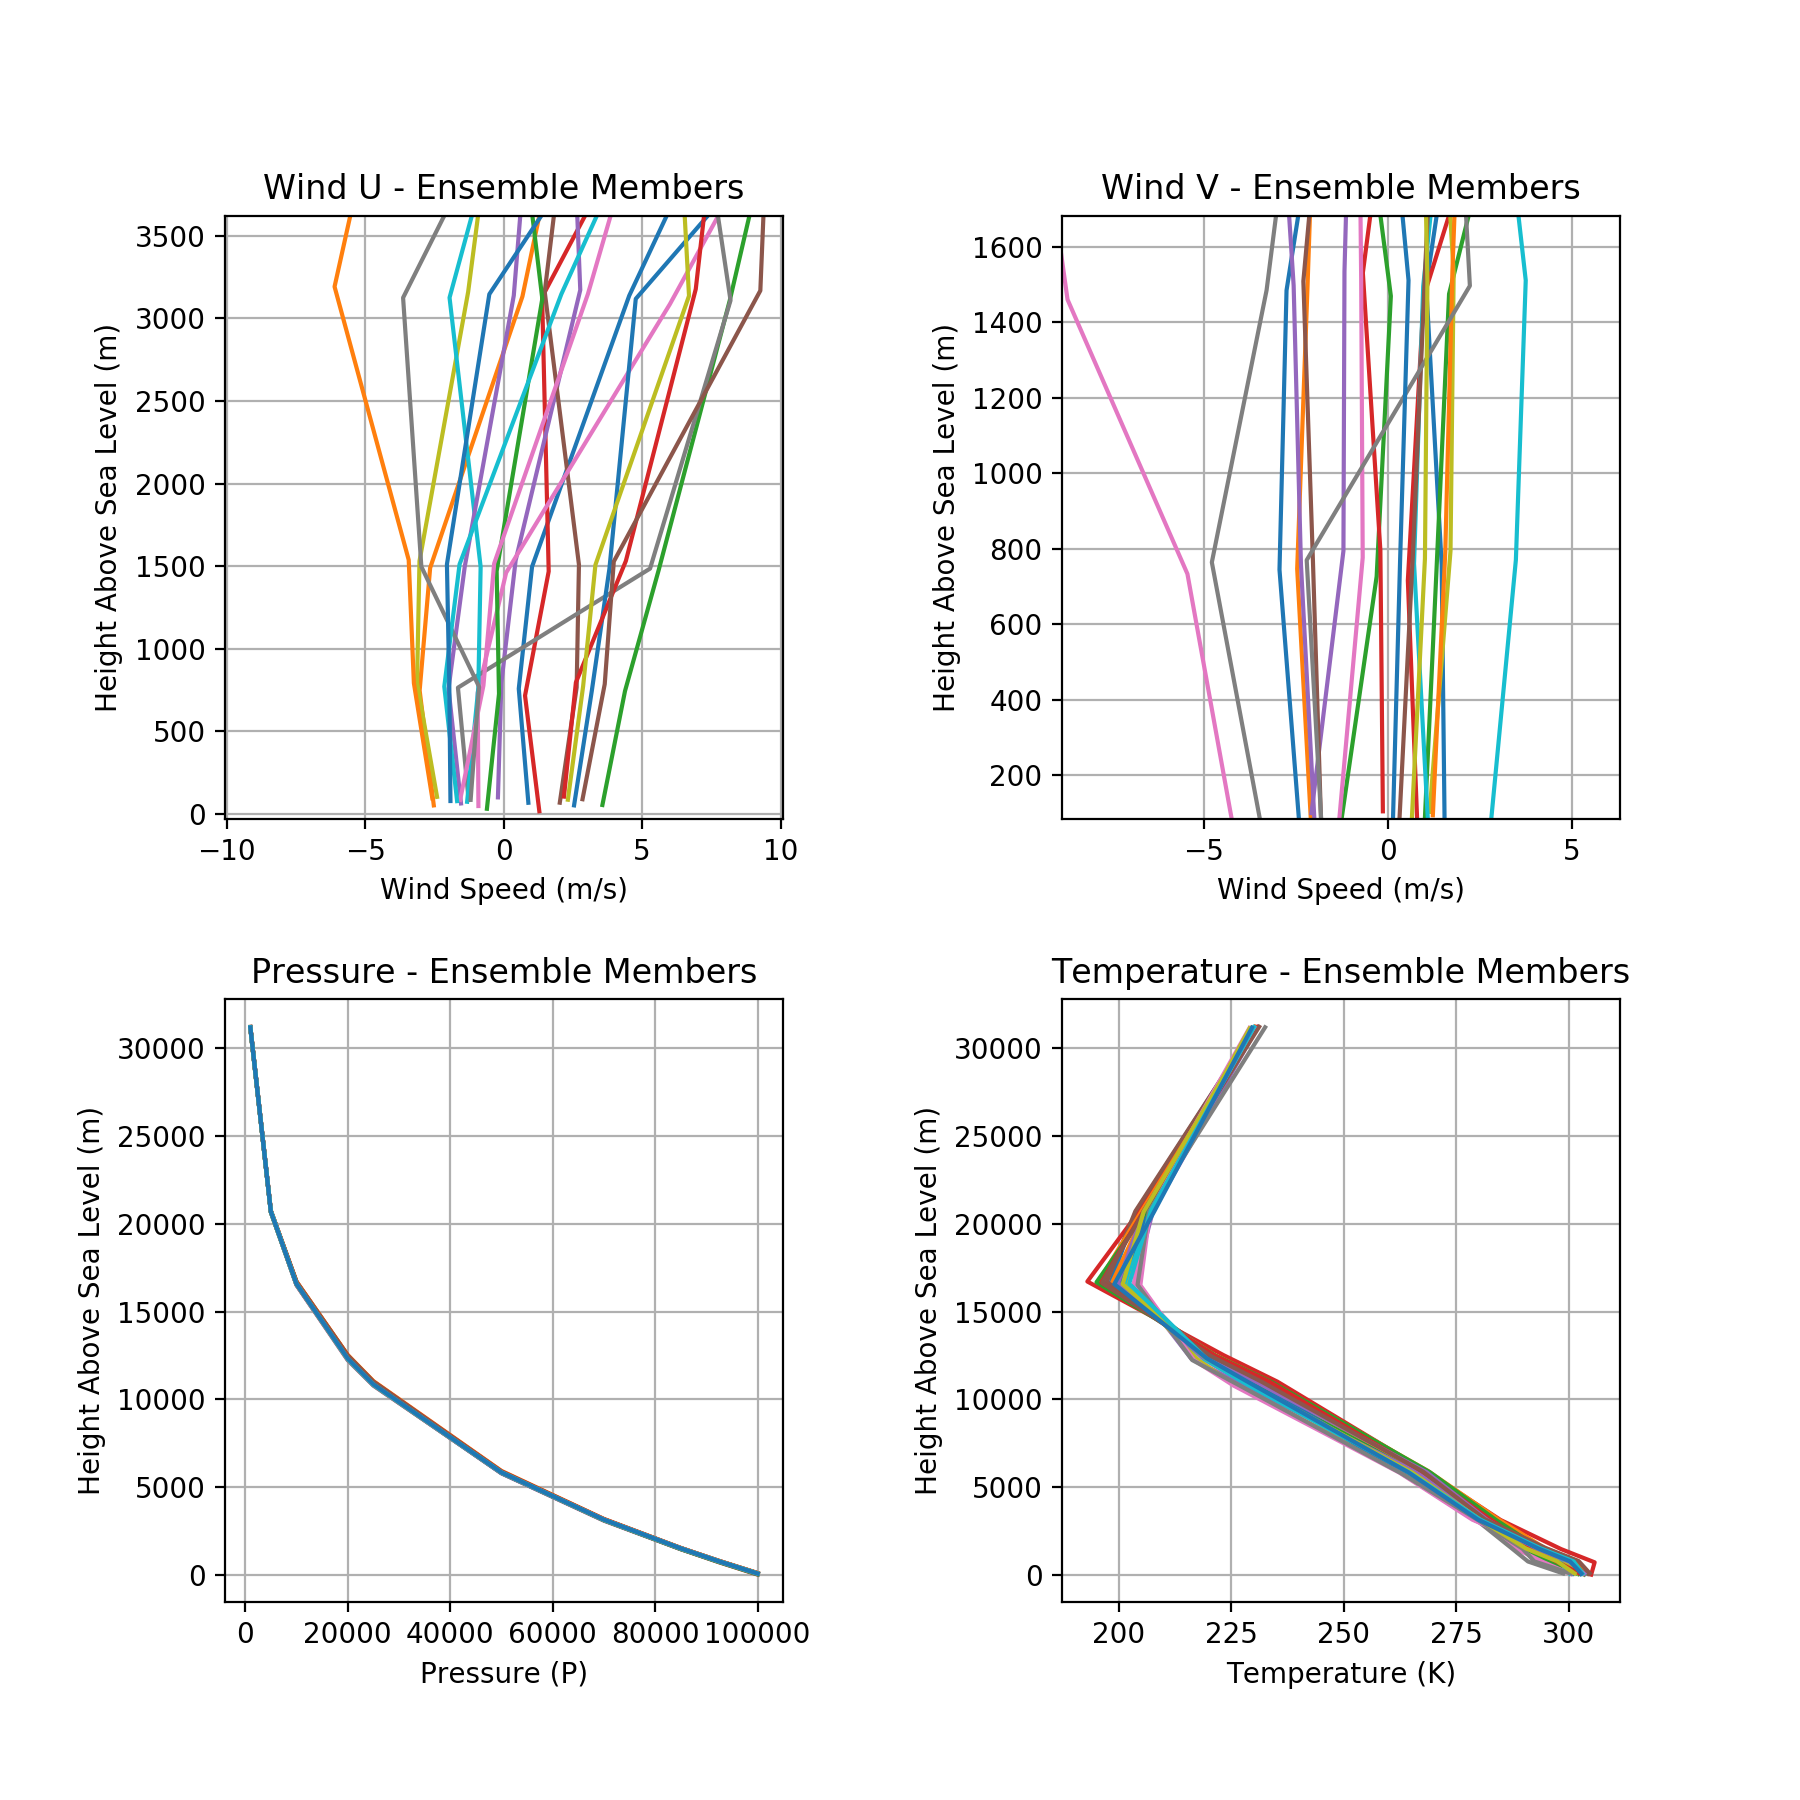

In [54]:
EnvCMC.allInfo()

#### ERA5 Ensemble

In [55]:
EnvERA5 = Environment(railLength=5,
                      date=(2018, 2, 17, 18),
                      latitude=-21.960641,
                      longitude=-47.482122)

In [56]:
EnvERA5.setAtmosphericModel(type='Ensemble',
                            file='../data/weather/CuritibaRioSaoPauloEnsemble_2018_ERA-5.nc',
                            dictionary='ECMWF')

Gravity Details

Acceleration of Gravity: 9.80665 m/s²


Launch Site Details

Launch Rail Length:  5  m
Launch Date:  2018-02-17 18:00:00  UTC
Launch Site Latitude: -21.96064°
Launch Site Longitude: -47.48212°
Launch Site Surface Elevation: 0.0 m


Atmospheric Model Details

Atmospheric Model Type:  Ensemble
Ensemble Maximum Height: 4.424 km
Ensemble Time Period: From  2018-01-01 00:00:00  to  2018-12-31 18:00:00  UTC
Ensemble Hour Interval:  6  hrs
Ensemble Latitude Range: From  -19.5 ° To  -26.0 °
Ensemble Longitude Range: From  306.0 ° To  320.0 °
Number of Ensemble Members:  10
Selected Ensemble Member:  0  (Starts from 0)


Atmospheric Model Plots


<IPython.core.display.Javascript object>


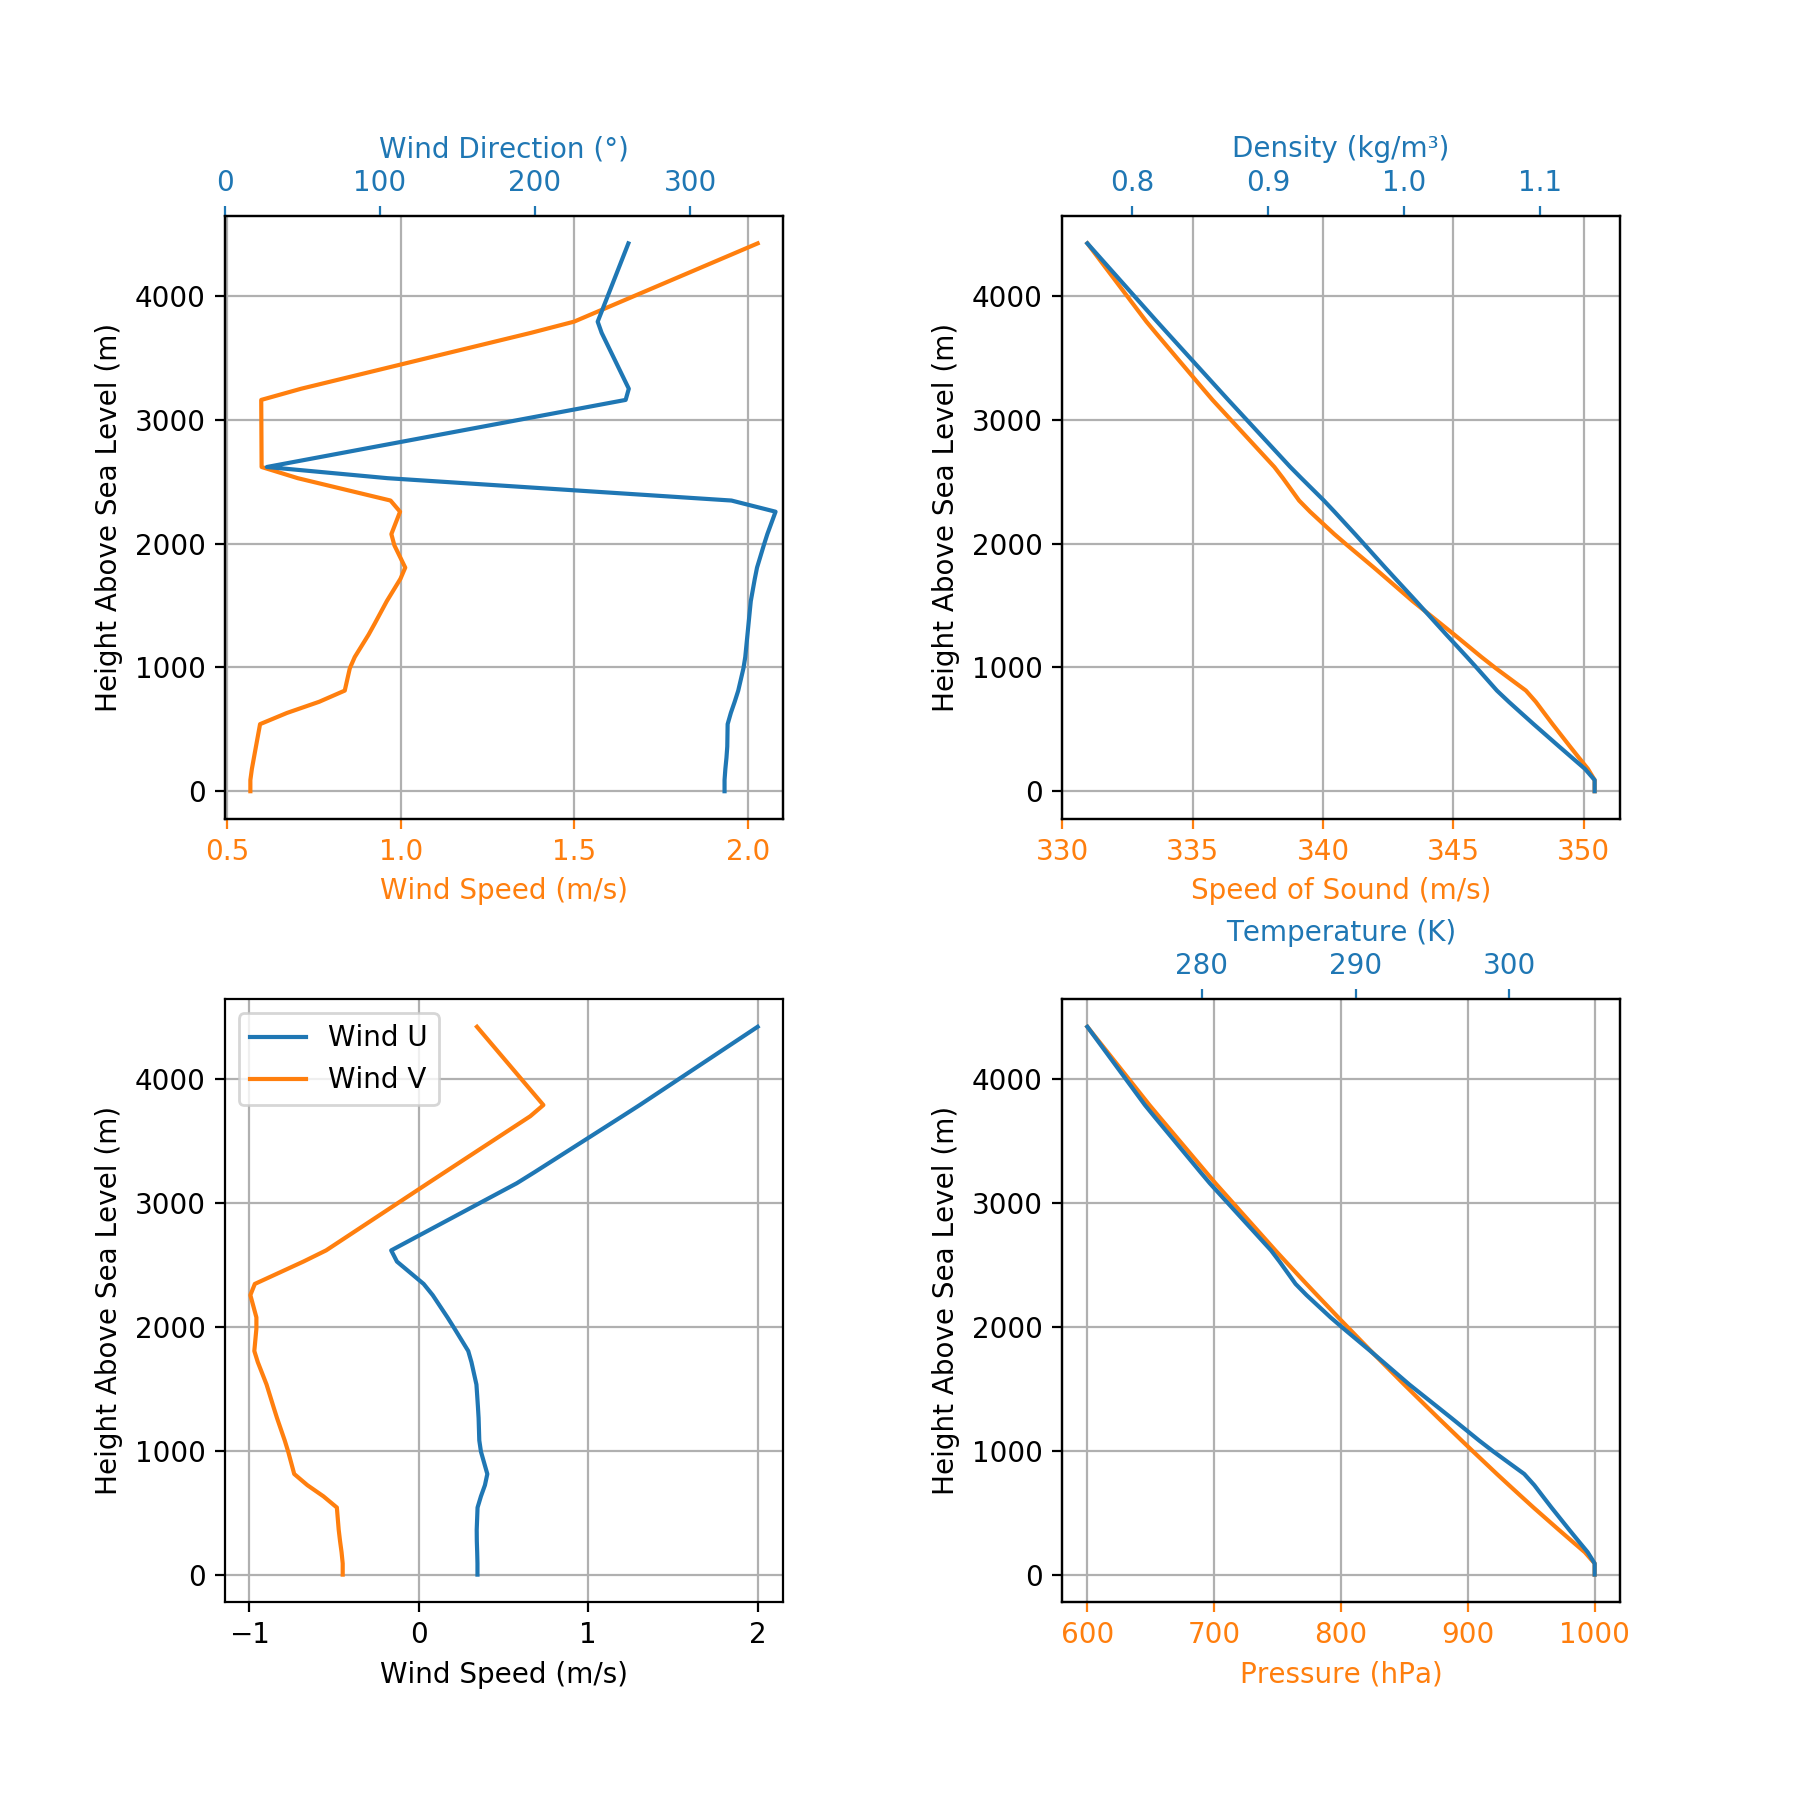



Ensemble Members Comparison


<IPython.core.display.Javascript object>


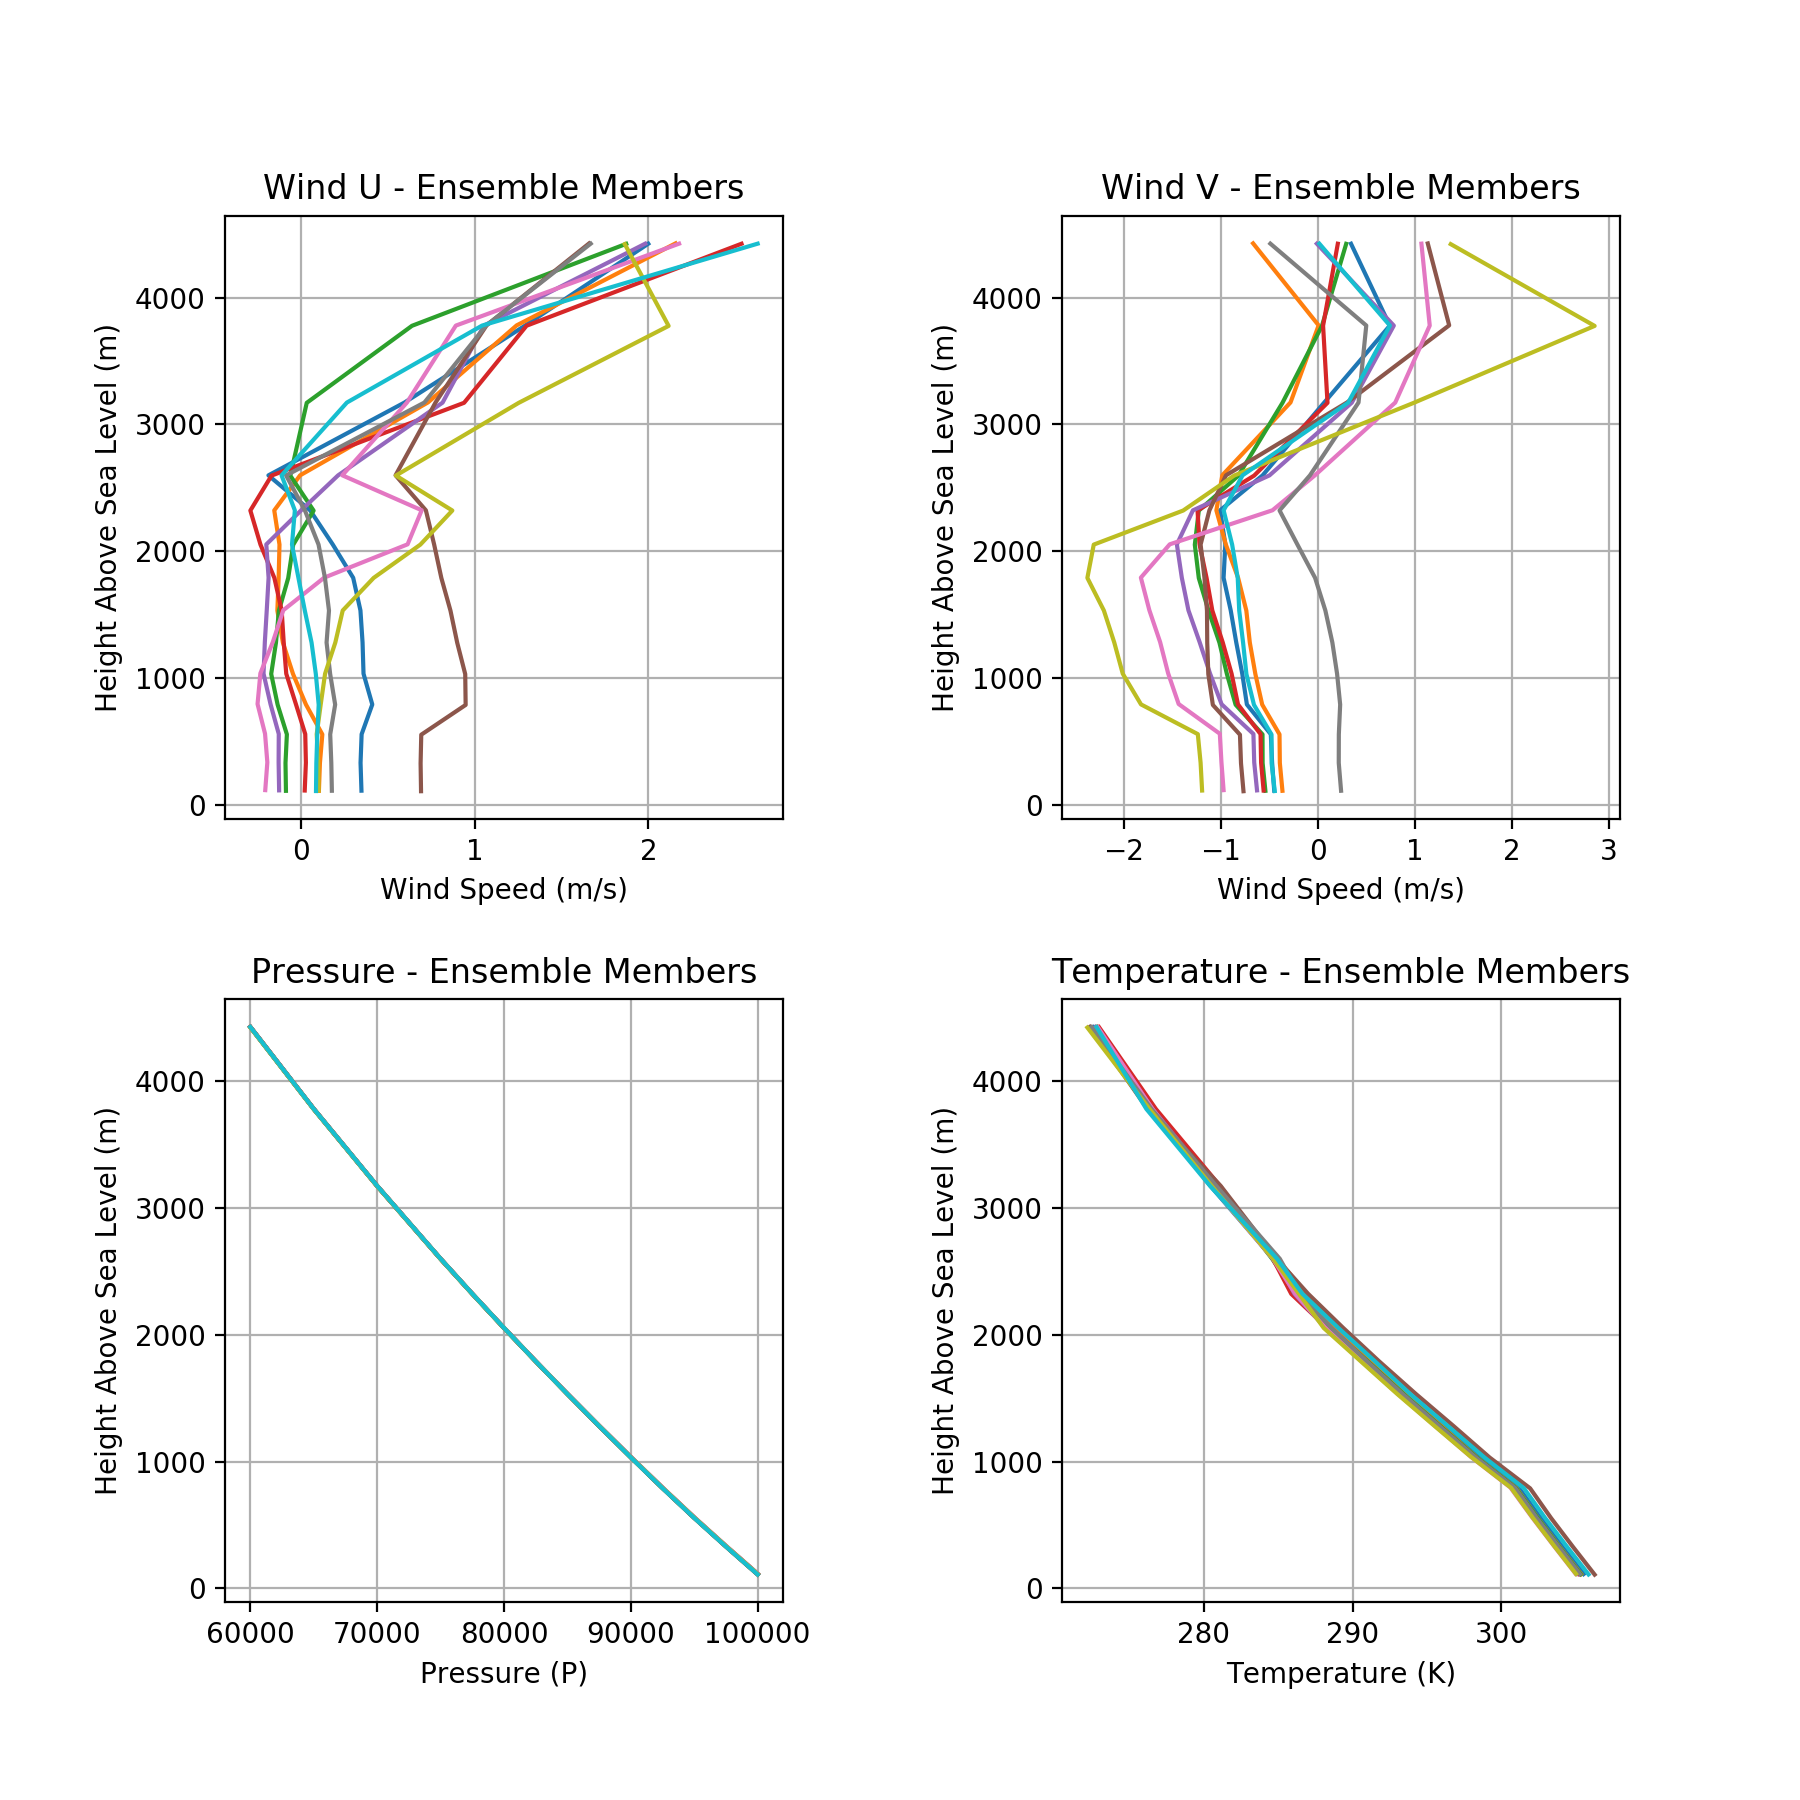

In [57]:
EnvERA5.allInfo()